In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import tellurium as te
from roadrunner import Config
import pandas as pd
import test_dict

plt.style.use('seaborn-darkgrid')
from matplotlib import rc,rcParams

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

rc('font', weight='bold')
rcParams['axes.labelsize'] = BIGGER_SIZE
rcParams['xtick.labelsize'] = MEDIUM_SIZE
rcParams['ytick.labelsize'] = MEDIUM_SIZE
rcParams['legend.fontsize'] = MEDIUM_SIZE
rcParams['text.usetex'] = False

In [2]:
modelpath = "/home/nexia/PhD/Parameter_Sampler/model_files/noV_cPL_conc.atm"
datapath = ""
Alex_to_amount = 1e-18*6.02214086e23

In [3]:
model = te.loada(modelpath)
scatter_dic = test_dict.mke_test_dict(model)
scatter_dic

{'Phosphatidylcholine_mem': {'mean': [133.26333333333335,
   208.4366666666667,
   763.0255555555556,
   1709.4966666666667],
  'std': [36.74838953387391,
   16.400699172088157,
   100.33359835697729,
   662.5245222882949]},
 'CDP_choline': {'mean': [4.566482434728078, nan, 308.86026649433546, nan],
  'std': [1.1989092064995173, nan, 16.32309903031891, nan]},
 'Choline_phosphate': {'mean': [0.20922792246390468,
   nan,
   20.092522712803543,
   nan],
  'std': [0.00020922792246390467, nan, 1.471237613516028, nan]},
 'Choline': {'mean': [7.90416595974751, nan, 42.67585402636786, nan],
  'std': [6.9276527654604845, nan, 13.385634156991442, nan]},
 'Phosphatidylcholine': {'mean': [nan, nan, 128.27664293917965, nan],
  'std': [nan, nan, 128.57253861320737, nan]}}

In [19]:
p = np.array([-3.3745890025594605, -4.078750381659864, -2.8340549020533885, -3.1736098325649746, 0.3904632419693267, 0.7916536936026601, 4.650735295021965, 2.7208148582822864, 4.248900749730447, 1.1524060945045043, 2.2458091818680286, 0.8526702082956129, -1.2919843012000158, 0.8633616144530107, 1.6237357826234027, 1.9801731529241673, 3.6599364976761333, -2.8135603350040066, -3.7898651445651916, -2.8169340938735434, 0.8703901483373538, -0.6236877956983412, -1.327786862856447, -1.235172306347224, -3.21956972834847])
p = 10**p
n=['cmax_ECholine_in', 'cmin_ECholine_in', 't12_ECholine_in', 's_ECholine_in', 'cmax_E2_7_1_32', 'cmin_E2_7_1_32', 't12_E2_7_1_32', 's_E2_7_1_32', 'cmax_E2_7_7_15', 'cmin_E2_7_7_15', 't12_E2_7_7_15', 's_E2_7_7_15', 'cmax_E2_7_8_2', 'cmin_E2_7_8_2', 't12_E2_7_8_2', 's_E2_7_8_2', 'cmax_EPC_mem', 'cmin_EPC_mem', 't12_EPC_mem', 's_EPC_mem', 'k_Choline_in', 'k_R01021', 'k_R01890', 'k_R01321', 'k_TransportPC']

parameters = dict(zip(n,p))
parameters
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]

model = te.loada(modelpath)
model.resetToOrigin()
model = set_model_parameters(model, parameters)

enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
selections = enzymes + model.getFloatingSpeciesIds()
# how selctions is used here floating species in mol
model.selections = ['time']+selections

#model.selections = ['time']+selections
try:
    model_res = model.simulate(0, 48 * 3600, 36000)

except:
    print(' not working')

Choline 0 9.011419122082891
Choline 2 136.00981532389392
return 114616691.37179603
Choline_phosphate 0 209.21723146399393
Choline_phosphate 2 274.40112354648824
return 10001354130192.965
CDP_choline 0 7.840159240242547
CDP_choline 2 5787.50184742062
return 3610984212.470941
Phosphatidylcholine 2 127.97820146965626
return 9953774.176821765
Phosphatidylcholine_mem 0 109.94709296985681
Phosphatidylcholine_mem 1 532.187244657269
Phosphatidylcholine_mem 2 30.643002255845175
Phosphatidylcholine_mem 3 1898.832146635676
return 386124139.2798036
CDP_choline 361.0984212470941
Choline_phosphate 1000135.4130192965
Phosphatidylcholine 0.9953774176821765
Choline 11.461669137179603
Phosphatidylcholine_mem 38.612413927980356
Value script function: 10005475809010.266
Score estimation: 500212.2733
Value_single_func/estimation_Score: 20002459.64178797
Value single function: 10005475809010.264


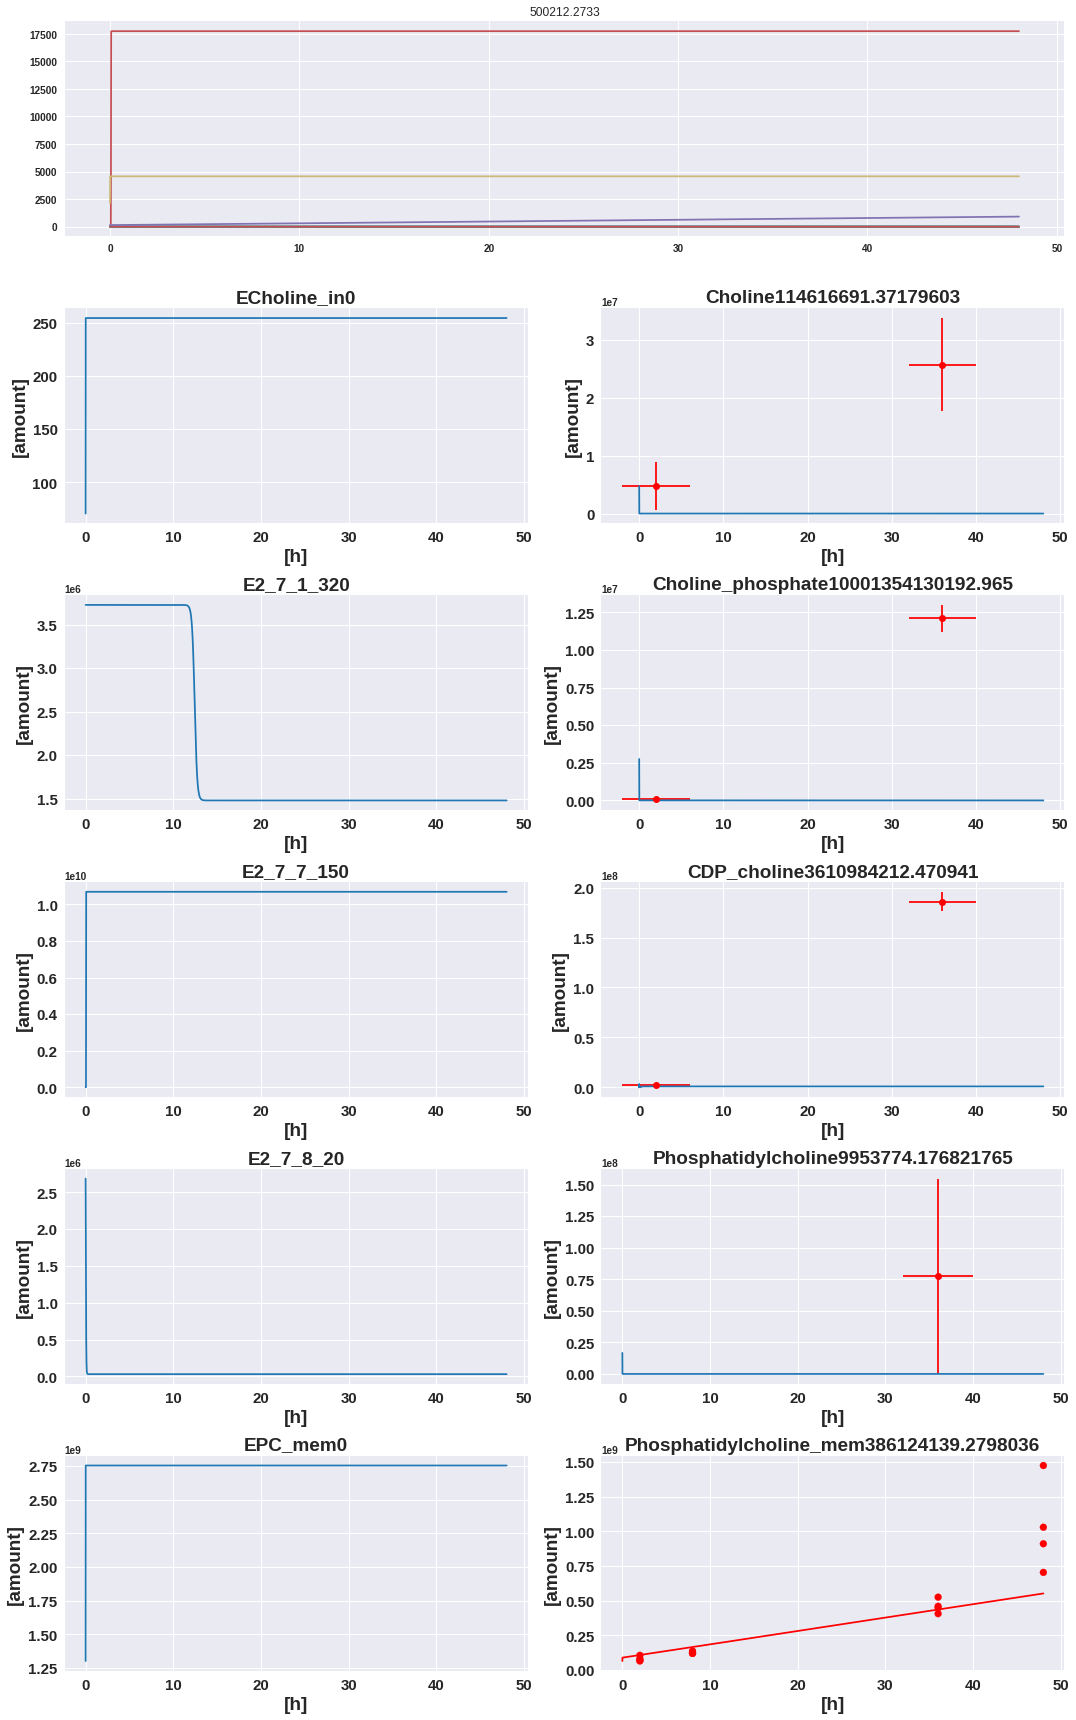

In [20]:
esti=500212.2733
res = simulation_to_panda(model_res)
res_dic = simulation_to_dict(res)
# floating species have to be divided by volume to be in M
fig = plt.figure(figsize=(15,24))

ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

ax1.set_title(esti)
ax1.plot(res['time']/3600,res.iloc[:,1:])

summe = 0
for it,col in enumerate(selections):
    plt.style.use('seaborn')
    cor=(int(coor_list[it][0]),int(coor_list[it][1]))
    color = 'tab:blue'
    ax2 = plt.subplot2grid((rows, ncol), cor)

    sqd_dis = 0
    if col in scatter_dic:
        sqd_dis = compute_sqd_distance_single(col, res_dic, scatter_dic)
        summe += sqd_dis
    if col == 'Phosphatidylcholine_mem':
        color = 'r'
        alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
        alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
        alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
        alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount

        ax2.scatter([2, 8,129600/3600,172800/3600], alex_data, 
                    color='red',linestyle='--', label='PC')

        ax2.scatter([2, 8,129600/3600,172800/3600], alex1, 
                    color='red',linestyle='--', label='PC')
        ax2.scatter([2, 8,129600/3600,172800/3600], alex2, 
                    color='red',linestyle='--', label='PC')
        ax2.scatter([2, 8,129600/3600,172800/3600], alex3, 
                    color='red',linestyle='--', label='PC')
    elif col in scatter_dic:
            scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
            scatter_std = np.asarray(scatter_dic[col]['std']) * Alex_to_amount
            ax2.errorbar(x=[2,8,129600/3600,172800/3600], y=scatter_amount,
                         xerr=4,
                         yerr= scatter_std, fmt='o', color='red')

    ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)

    ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
    ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
    ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
    ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')


print(f'Value script function: {compute_sqd_distance(res_dic, scatter_dic)}')
print(f'Score estimation: {esti}')
print('Value_single_func/estimation_Score:',summe/esti)
print(f'Value single function: {summe}')
plt.tight_layout()   
#plt.savefig(esti+'.png', format="png")
plt.show()
plt.close()

In [3]:
1/Alex_to_amount


1.6605390395999472e-06

### Create parameter set to_fit.txt, given to CMA-ES as starting point 

In [4]:
pc_test = te.loada(modelpath)
pc_test.getGlobalParameterIds()
a = pc_test.getGlobalParameterIds()
b = np.random.rand(len(a))

dic = dict(zip(a,b))
# values that are not be fit
# enzymes concentration are assigned, thus no setting possible 
dic = {i:dic[i] for i in dic if not i.startswith('E')}  
# volume growth is set from experimental findings

dic.keys()

dict_keys(['cmax_ECholine_in', 'cmin_ECholine_in', 't12_ECholine_in', 's_ECholine_in', 'cmax_E2_7_1_32', 'cmin_E2_7_1_32', 't12_E2_7_1_32', 's_E2_7_1_32', 'cmax_E2_7_7_15', 'cmin_E2_7_7_15', 't12_E2_7_7_15', 's_E2_7_7_15', 'cmax_E2_7_8_2', 'cmin_E2_7_8_2', 't12_E2_7_8_2', 's_E2_7_8_2', 'cmax_EPC_mem', 'cmin_EPC_mem', 't12_EPC_mem', 's_EPC_mem', 'k_Choline_in', 'k_R01021', 'k_R01890', 'k_R01321', 'k_TransportPC', 't'])

In [68]:

def calculate_alex():
    
    alex_data = np.array([133.0, 208.0, 763.0, 1709.0])
    alex1 = np.array([107.29, 227.37, 674.67, 1511.67])
    alex2 = np.array([117.19, 199.33, 742.31, 2448.40])
    alex3 = np.array([175.31, 198.61, 872.10, 1168.42])
    alex = np.dstack((alex_data,alex1,alex2,alex3))
    
    y_alex = np.mean(alex[0], axis=1)
    y_er = np.std(alex[0], axis=1)
    
    return y_alex, y_er
    


<ErrorbarContainer object of 3 artists>

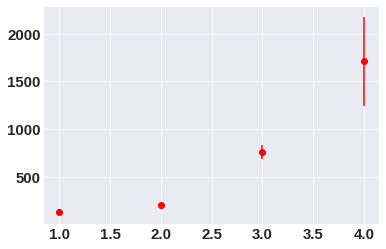

In [67]:
plt.errorbar(x=[1,2,3,4], y=y_alex, yerr=y_er, fmt='ro')

In [7]:
def simple_plot(names, ncol):

    subfigs=len(names)
    if subfigs %ncol >= 1:
        rows=int(np.ceil(subfigs/ncol))
    else:
        rows=int(subfigs/ncol)
    #print(rows.type)
    x_width = 5*ncol 
    fig, axes = plt.subplots(nrows=rows, ncols=ncol, figsize=(x_width, 5*rows))
    fig.subplots_adjust(hspace = .5, wspace=.15)
    
    nx, ny = (rows, ncol)
    x = np.linspace(0, rows-1, nx)
    y = np.linspace(0, ncol-1, ny)

    xv, yv = np.meshgrid(x, y)
    coor_list = np.column_stack((xv.ravel(),yv.ravel()))

    for axnum, file in enumerate(names):
        if ncol == 1:
            cor=(int(coor_list[axnum][0]))
        else:
            cor=(int(coor_list[axnum][0]),int(coor_list[axnum][1]))

        filename = file
        path= datapath
        with open(path+filename, 'rb') as g:
            data = pickle.loads(g.read())
         
        try:
            axes[cor].plot(data['time']/3600, data['Phosphatidylcholine_mem']*Alex_to_amount)
        except:
            axes[cor].plot(data['time']/3600, data['[Phosphatidylcholine_mem]']*Alex_to_amount)
        
        y_alex, y_er = calculate_alex() 
        
        axes[cor].errorbar([0, 8,129600/3600,172800/3600], y=y_alex*Alex_to_amount, yerr=y_er*Alex_to_amount, fmt='ro',label='PC')
        axes[cor].legend(loc='upper left')
        axes[cor].set_xlabel('time in [h]')
        axes[cor].set_ylabel('Amount',fontsize=BIGGER_SIZE,fontweight='bold')
        
        axes[cor].set_title(file)
        
    for i in range(ncol*rows):
         if axes.flat[i].has_data() == False:
            axes.flat[i].set_visible(False) # to remove plot if no data
    fig.tight_layout()
    return


def compute_sqd_distance_single(molecule, simulation_result_dict, data, factor=10**7,
                         normalized=True):
    dist = 0.
    # list of intersecting keys, as only those relevant
    inter = data.keys() & simulation_result_dict.keys()
    alex_bias_lst = ['DAG', 'Phosphatidylserine_mem',
                     'Phosphatidylethanolamine_mem', 'Phosphatidylcholine_mem']
   
    # iterate through the measured timepoints, thus finer evaluation of fit
    for i, mean in enumerate(data[molecule]['mean']):
        bias_fac = 1
        # some data entries empty as no literature value found, thus skiped
        if np.isnan(mean):
            continue
        if molecule in alex_bias_lst:
            bias_fac = 2
        if normalized:
            dist += np.nansum(((mean
                    - simulation_result_dict[molecule][i])**2  # noqa:E128
                    * bias_fac)  # noqa:E128
                    / (data[molecule]['std'][i]**2))   # noqa: E128
            value = np.nansum(((mean
                    - simulation_result_dict[molecule][i])**2  # noqa:E128
                    * bias_fac)  # noqa:E128
                    / (data[molecule]['std'][i]))
            print(molecule,i, value)
        else:
            dist += np.nansum(bias_fac*(mean
                    - simulation_result_dict[molecule][i])**2)  # noqa:E128
    print('return', dist * factor)
    return dist * factor
    
def compute_sqd_distance(simulation_result_dict, data, factor=10**7,
                         normalized=True):

    dist = 0.
    # list of intersecting keys, as only those relevant
    inter = simulation_result_dict.keys() & data.keys()
    alex_bias_lst = ['DAG', 'Phosphatidylserine_mem',
                     'Phosphatidylethanolamine_mem', 'Phosphatidylcholine_mem']
    for molecule in inter:
        summe = 0.
        if molecule == 'time':
            continue
        # iterate through the measured timepoints, thus finer evaluation of fit
        for i, mean in enumerate(data[molecule]['mean']):
            bias_fac = 1
            # some data entries empty as no literature value found, thus skiped
            if np.isnan(mean):
                continue
            if molecule in alex_bias_lst:
                bias_fac = 2
            if normalized:
                dist += np.nansum(((mean
                        - simulation_result_dict[molecule][i])**2  # noqa:E128
                        * bias_fac)  # noqa:E128
                        / data[molecule]['std'][i]**2)   # noqa: E128
                
                summe += np.nansum(((mean
                        - simulation_result_dict[molecule][i])**2  # noqa:E128
                        * bias_fac)  # noqa:E128
                        / data[molecule]['std'][i]**2)   # noqa: E128
            else:
                dist += np.nansum(bias_fac*(mean
                        - simulation_result_dict[molecule][i])**2)  # noqa:E128
        print(molecule, summe)
    return dist * factor


def plot_results_df(model_res, esti:str, t_data):
    rows = 6
    ncol= 2
    nx, ny = (rows, ncol)
    x = np.linspace(0, rows-1, nx)
    y = np.linspace(0, ncol-1, ny)

    xv, yv = np.meshgrid(x, y)
    coor_list = np.column_stack((xv.ravel(),yv.ravel()))
    coor_list = [x for x in coor_list if x[0] != 0]


    res = model_res
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    #ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])

    summe = 0
    for it,col in enumerate(res.columns):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)

        sqd_dis = 0
        
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance_single(col, res_dic, t_data)
            summe += sqd_dis
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount

            ax2.scatter([0, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')

            ax2.scatter([0, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(t_data[col]['mean']) * Alex_to_amount
                ax2.scatter([0,8,129600/3600,172800/3600], scatter_amount,
                           color='red',linestyle='--')

        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)

        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
    
    print(f'Value single function: {summe}')
    print(f'Value script function: {compute_sqd_distance(res_dic, t_data)}')
    
    ax1.set_title(esti+str(summe))
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()
    
    return


In [6]:
def simulation_to_dict(simulation_result_p):

    s_panda = simulation_result_p

    u_time = 2 * 3600
    ring_time = 8 * 3600
    troph_time = 36 * 3600
    schiz_time = 48 * 3600

    measure_points = [u_time, ring_time, troph_time, schiz_time]
    # find most similar timepoint in simulation_results
    can = []
    for item in measure_points:
        can.append(min(s_panda['time'], key=lambda x: abs(x - item)))

    # cut df to size of the matching time points
    s_panda = s_panda[s_panda['time'].isin(can)]

    # dict with molecule names as keys and value is list of values at the specified timepoints
    return s_panda.drop('time', axis=1).to_dict('list')

def set_model_parameters(model, params, excluded_values=[]):
    no_names = excluded_values
    for param_id in params: 
        if any(x in param_id for x in no_names):
            continue
        else:
            try:
                model[param_id] = params[param_id]
                # print(model[param_id])
            except RuntimeError:
                print('could not set parameter : {0}'.format(param_id))
                continue
            except TypeError:
                #print('try to set {0} to {1}'.format(model[param_id]),params[param_id])
                print(format(model[param_id]))  # 
                print(format(params[param_id]))
    return model


def simulation_to_panda(simulation_result):
    #print(simulation_result.colnames)
    return pd.DataFrame(simulation_result, columns=simulation_result.colnames)


['20210616-12:31:40dataplot.txt', '20210618-09:43:03dataplot.txt', '20210623-15:23:43dataplot.txt', '20210714-16:43:08dataplot.txt', '20210714-17:19:17dataplot.txt', '20210726-12:43:51dataplot.txt', '20210727-15:21:17dataplot.txt', '20210727-17:30:12dataplot.txt']
Choline 0 8.444742254549443
Choline 2 134.43421898921804
return 112621618.69332477
Choline_phosphate 0 0.0005337882566950464
Choline_phosphate 2 267.90439114563395
return 1846458057.5276494
CDP_choline 0 17.082041173108074
CDP_choline 2 5842.5993280833345
return 3721824267.31035
Phosphatidylcholine 2 13892.529779984778
return 1080520765.151766
Phosphatidylcholine_mem 0 34.920371515169705
Phosphatidylcholine_mem 1 462.8279406404541
Phosphatidylcholine_mem 2 95.3745539421791
Phosphatidylcholine_mem 3 1557.8917375501753
return 324722907.3637684
Value single function: 7086147616.046859
Phosphatidylcholine 108.0520765151766
Choline 11.262161869332477
Phosphatidylcholine_mem 32.47229073637684
CDP_choline 372.182426731035
Choline_ph

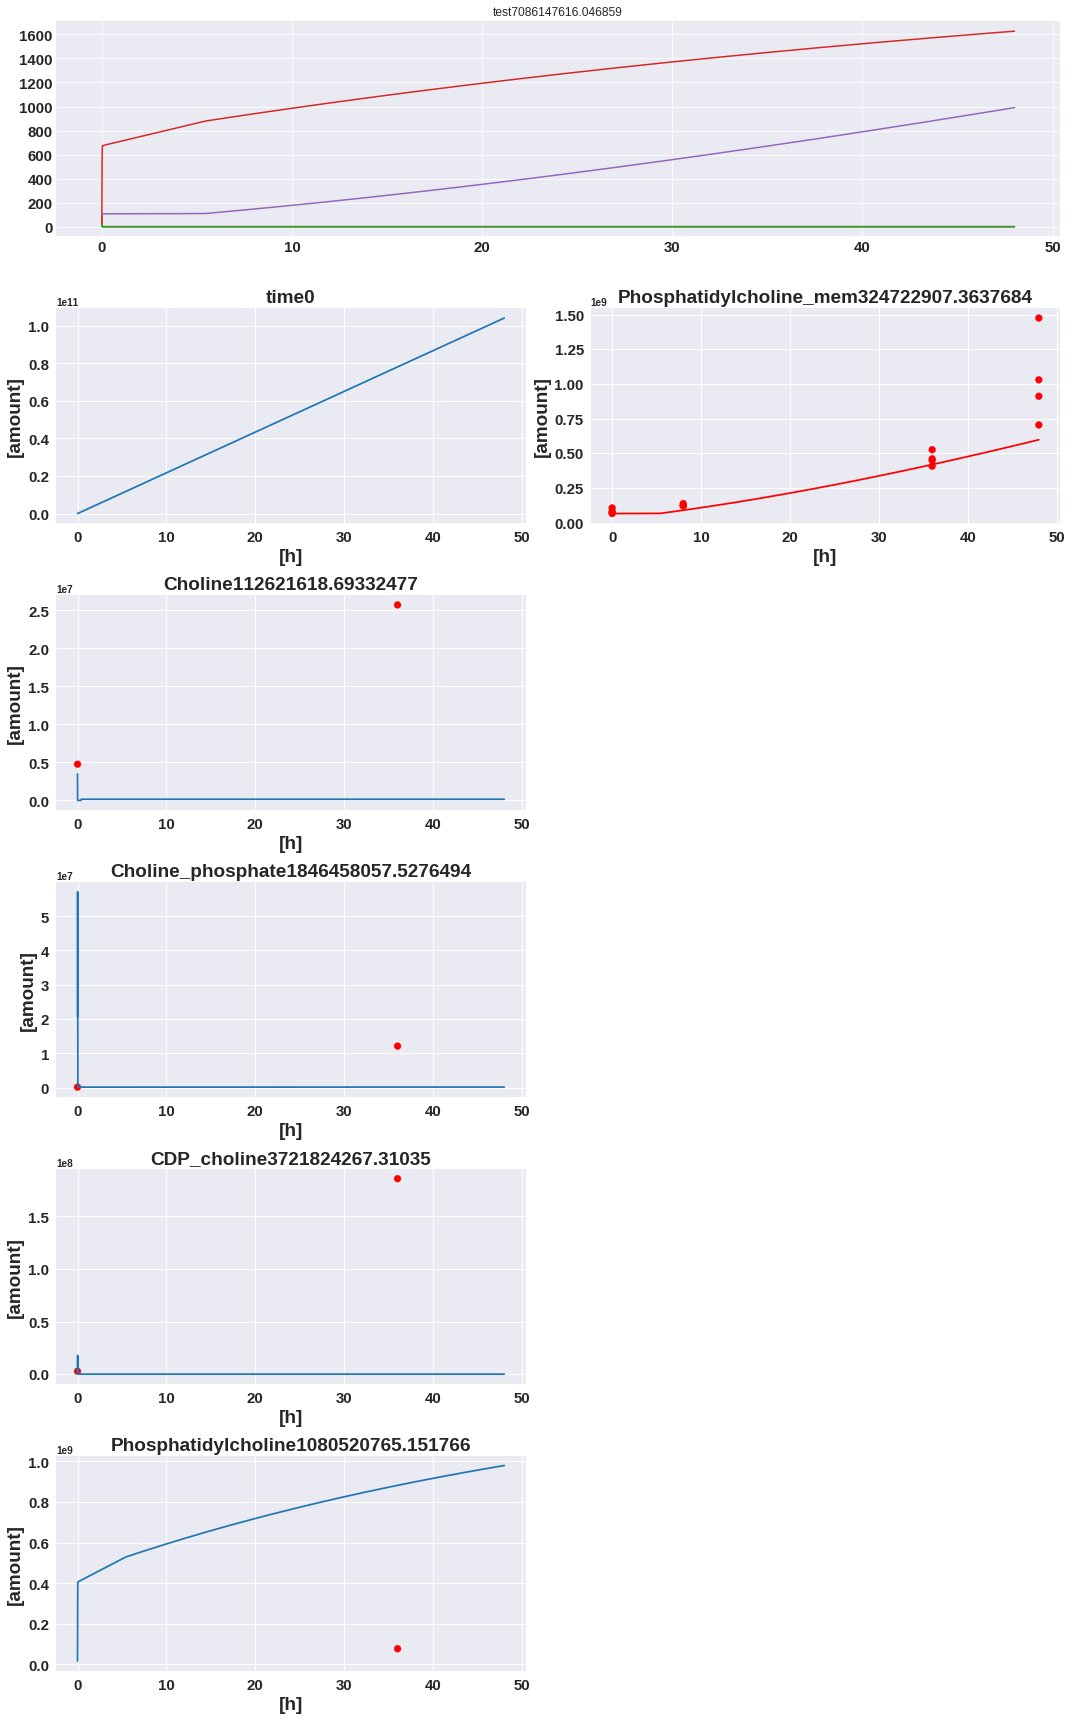

Choline 0 0.6391074346368413
Choline 2 101.58865798074689
return 76816340.80721709
Choline_phosphate 0 209.2279224639047
Choline_phosphate 2 274.401269554089
return 10001865105045.123
CDP_choline 0 17.393111766623566
CDP_choline 2 5844.151532853143
return 3725369806.037035
Phosphatidylcholine 2 127.98142823677193
return 9954025.14543065
Phosphatidylcholine_mem 0 79.21012414164767
Phosphatidylcholine_mem 1 167.1547585567371
Phosphatidylcholine_mem 2 6976.825930936061
Phosphatidylcholine_mem 3 7141.472566898436
return 926628704.4614807
Value single function: 10006603873921.572
Phosphatidylcholine 0.995402514543065
Choline 7.681634080721709
Phosphatidylcholine_mem 92.66287044614808
CDP_choline 372.5369806037035
Choline_phosphate 1000186.5105045122
Value script function: 10006603873921.574


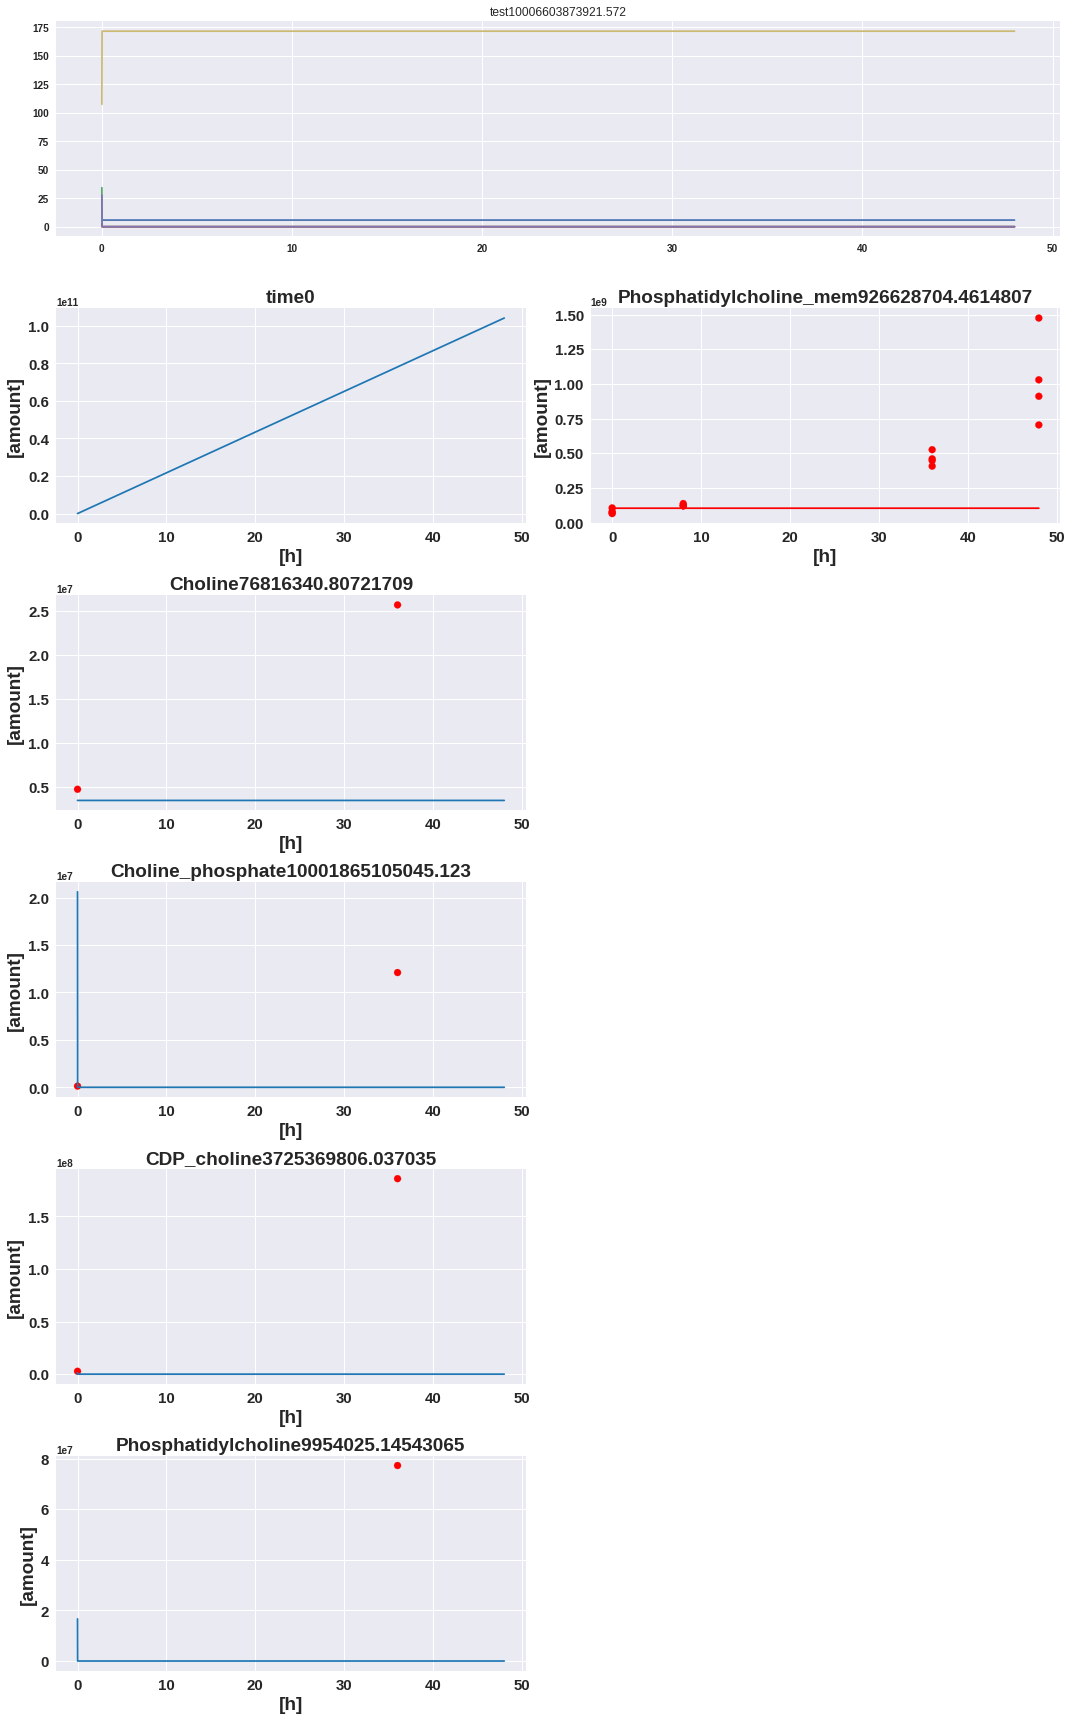

Choline 0 9.018327221978222
Choline 2 136.0584411243619
return 114662990.00343066
Choline_phosphate 0 7.060861035329768e-07
Choline_phosphate 2 0.002833154755950757
return 53004.170372611465
CDP_choline 0 17.39311175978112
CDP_choline 2 5844.151532823955
return 3725369805.962081
Phosphatidylcholine 2 127.98142615007102
return 9954024.983133093
Phosphatidylcholine_mem 0 108.82232436448486
Phosphatidylcholine_mem 1 174.24484922779988
Phosphatidylcholine_mem 2 949.1529888672374
Phosphatidylcholine_mem 3 3195.884513659221
return 278692840.9628638
Value single function: 4128732666.0818815
Phosphatidylcholine 0.9954024983133092
Choline 11.466299000343067
Phosphatidylcholine_mem 27.869284096286382
CDP_choline 372.5369805962081
Choline_phosphate 0.005300417037261146
Value script function: 4128732666.081881


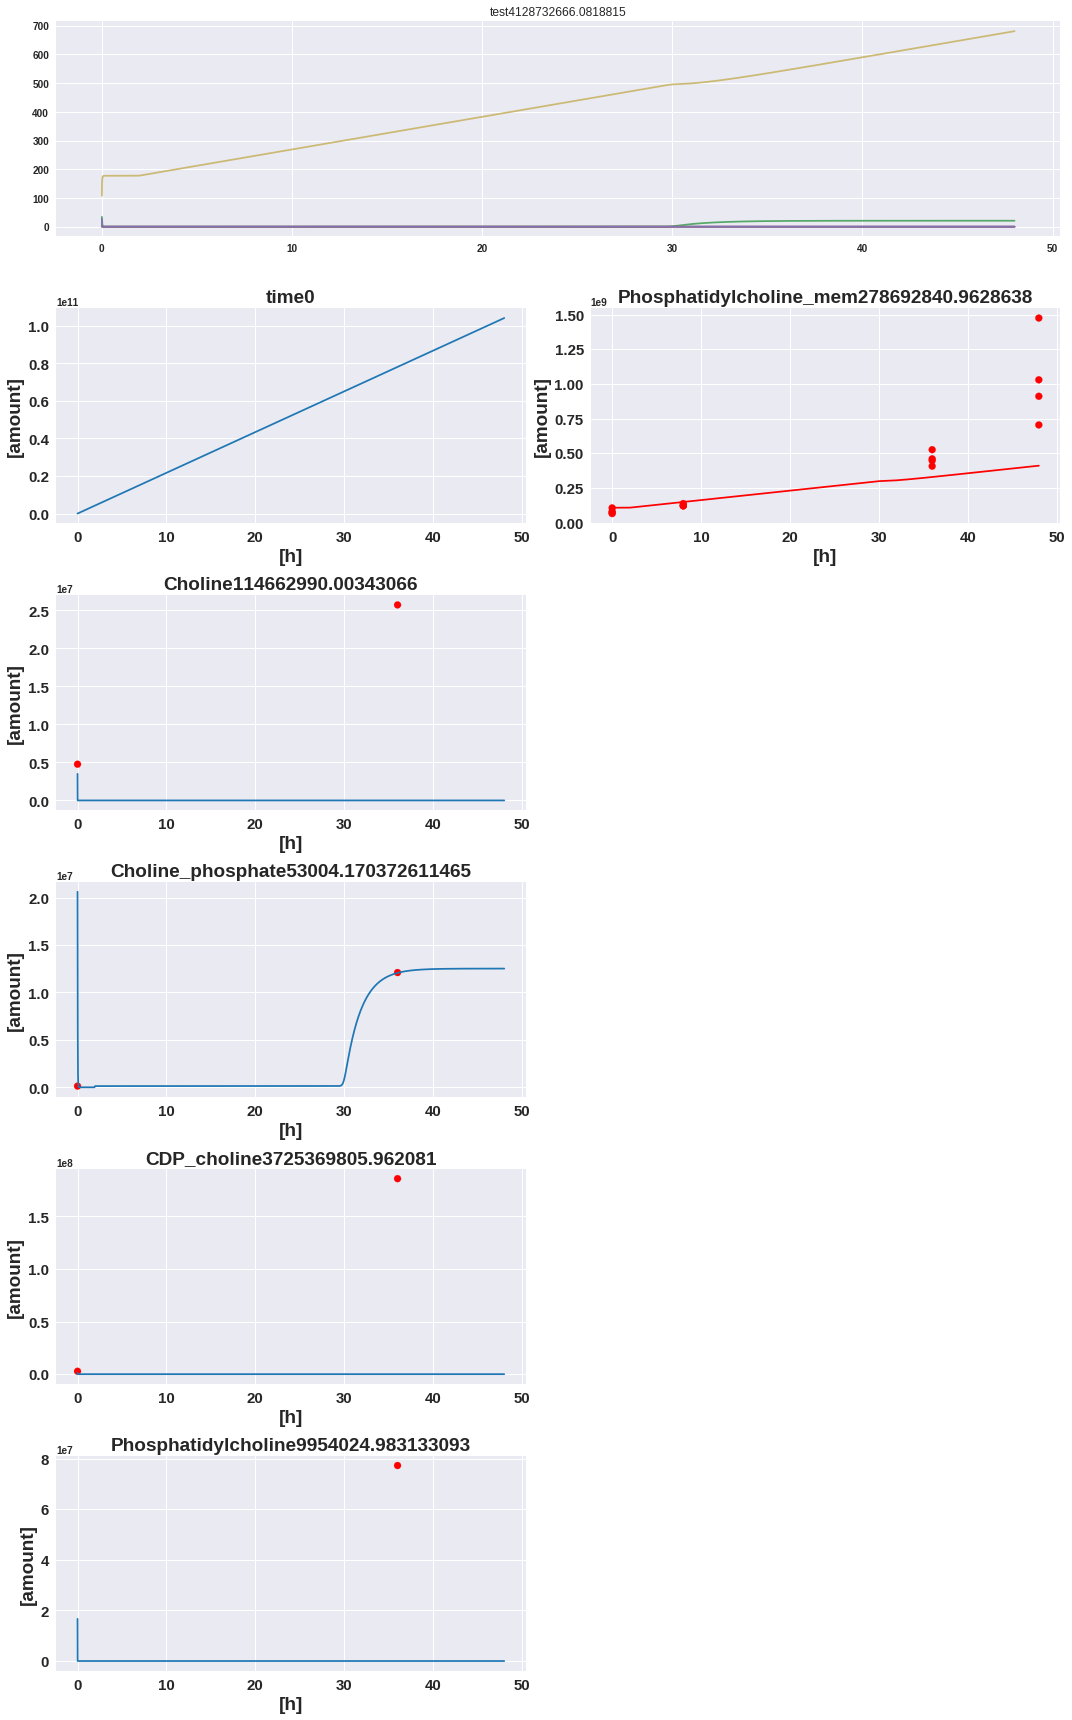

Choline 0 1.172707846906604
Choline 2 136.0513107593446
return 103332587.17083198
Choline_phosphate 0 1.2129528508660196e-08
Choline_phosphate 2 0.13842008251288668
return 941420.835114718
CDP_choline 0 17.393111032681688
CDP_choline 2 5844.151532249889
return 3725369799.5457172
Phosphatidylcholine 2 1.054110504223198
return 81985.66471448023
Phosphatidylcholine_mem 0 0.222610497773203
Phosphatidylcholine_mem 1 1.1088234866293472
Phosphatidylcholine_mem 2 7.17630394167321
Phosphatidylcholine_mem 3 1979.7638474500848
return 31334026.155536298
Value single function: 3861059819.3719144
Phosphatidylcholine 0.008198566471448022
Choline 10.333258717083197
Phosphatidylcholine_mem 3.1334026155536296
CDP_choline 372.53697995457173
Choline_phosphate 0.0941420835114718
Value script function: 3861059819.371915


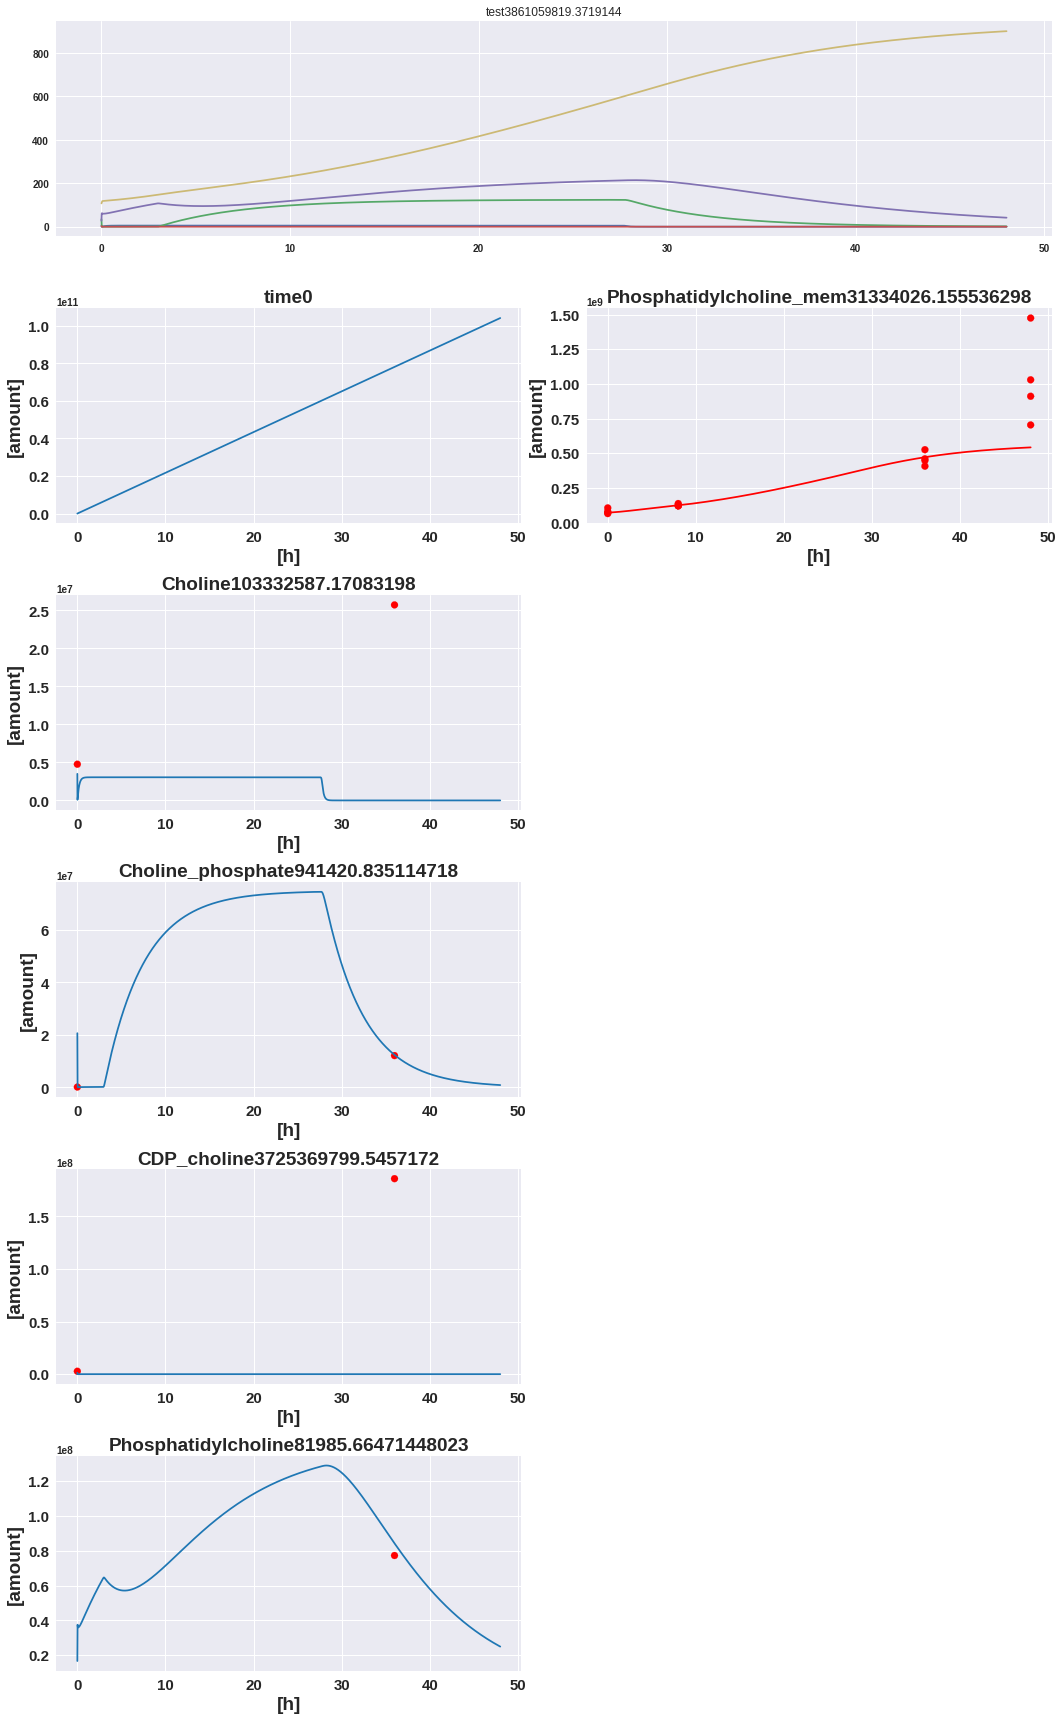

Choline 0 9.018327221941707
Choline 2 136.05844112536647
return 114662990.00412843
Choline_phosphate 0 92612.0318590384
Choline_phosphate 2 57042.16519681444
return 4426758286348229.5
CDP_choline 0 15.835686230041869
CDP_choline 2 5107.963703339207
return 3261369610.9302573
Phosphatidylcholine 2 127.98142823627146
return 9954025.145391725
Phosphatidylcholine_mem 0 118.65570740810423
Phosphatidylcholine_mem 1 0.8396915462900743
Phosphatidylcholine_mem 2 10.705259282368795
Phosphatidylcholine_mem 3 1096.733563984631
return 50421490.19495685
Value single function: 4426761722756345.5
Phosphatidylcholine 0.9954025145391725
Choline 11.466299000412842
Phosphatidylcholine_mem 5.042149019495684
CDP_choline 326.1369610930257
Choline_phosphate 442675828.63482296
Value script function: 4426761722756346.0


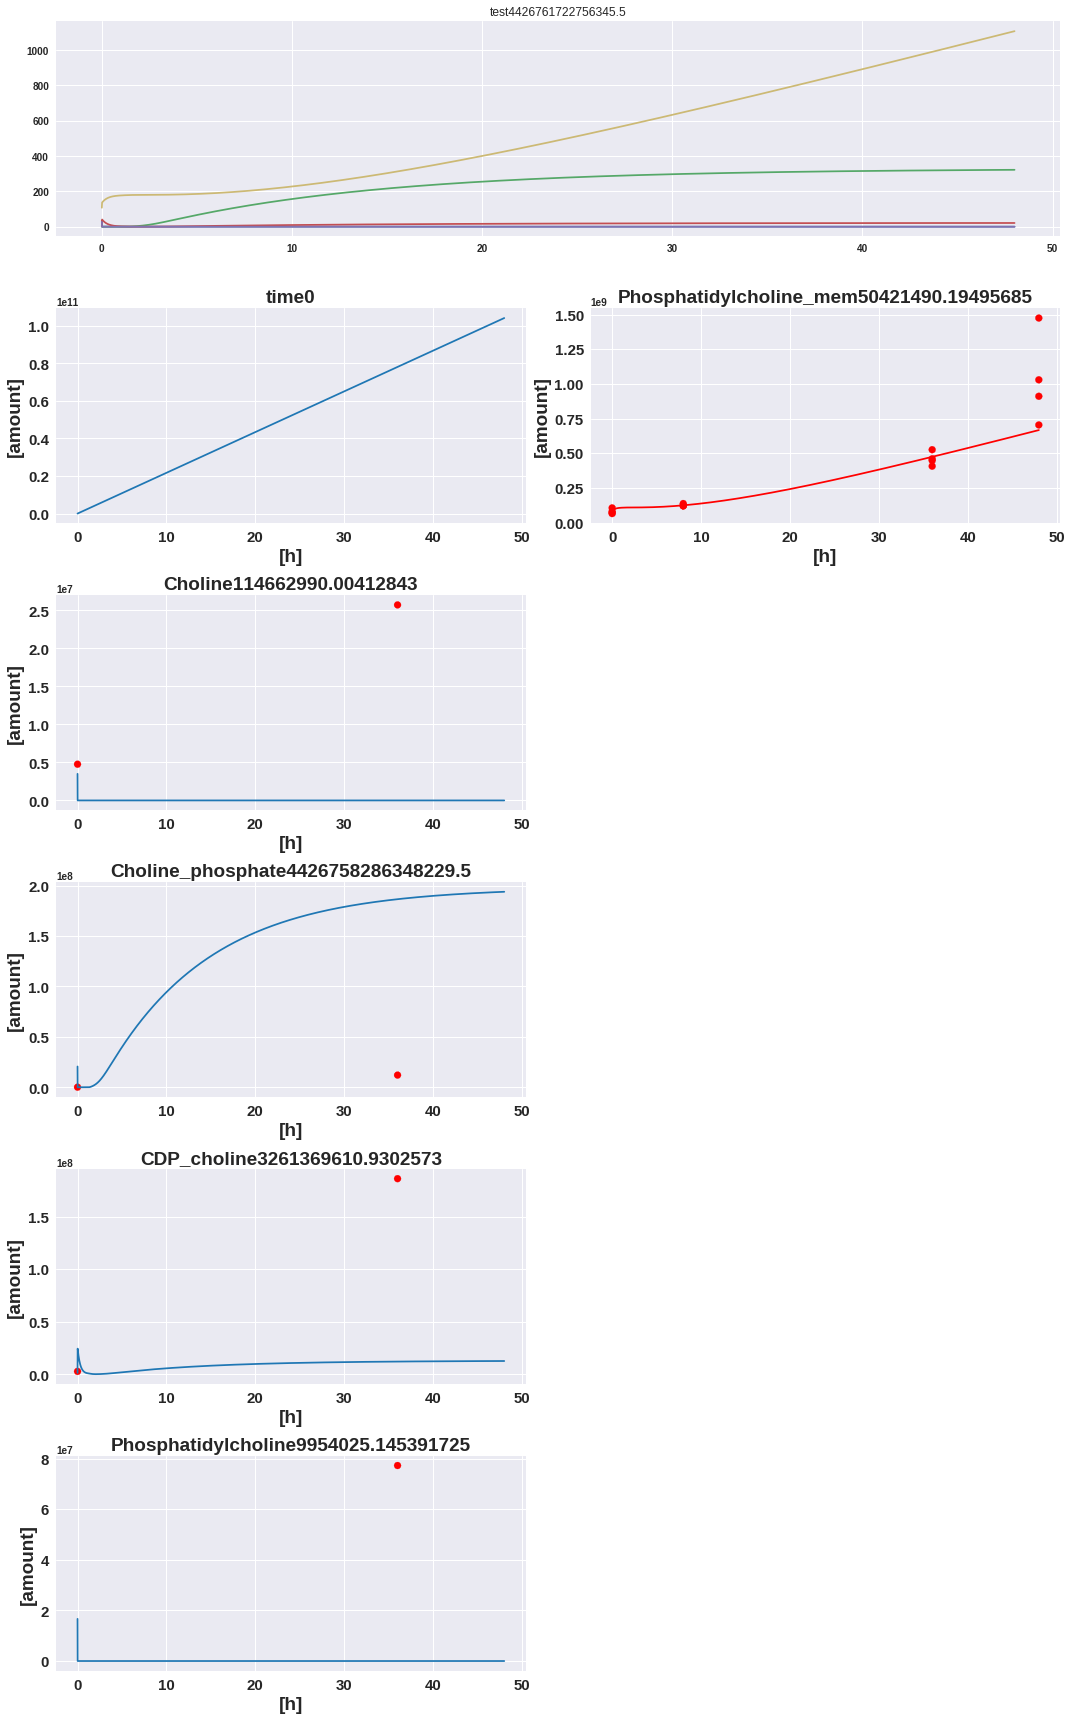

Choline 0 9.018327221987509
Choline 2 136.05844112575008
return 114662990.00448112
Choline_phosphate 0 8.949042801436126e-09
Choline_phosphate 2 0.0007674957775623975
return 5644.385149892543
CDP_choline 0 0.00035461282046735505
CDP_choline 2 0.003610468876703348
return 5169.672546302498
Phosphatidylcholine 2 0.5372191886346276
return 41783.35392838256
Phosphatidylcholine_mem 0 0.00034108270068598735
Phosphatidylcholine_mem 1 0.0007295499054164103
Phosphatidylcholine_mem 2 8.300013127681426
Phosphatidylcholine_mem 3 1000.6477740201371
return 15931337.581338914
Value single function: 130646924.99744461
Phosphatidylcholine 0.004178335392838256
Choline 11.466299000448112
Phosphatidylcholine_mem 1.5931337581338914
CDP_choline 0.0005169672546302497
Choline_phosphate 0.0005644385149892544
Value script function: 130646924.9974446


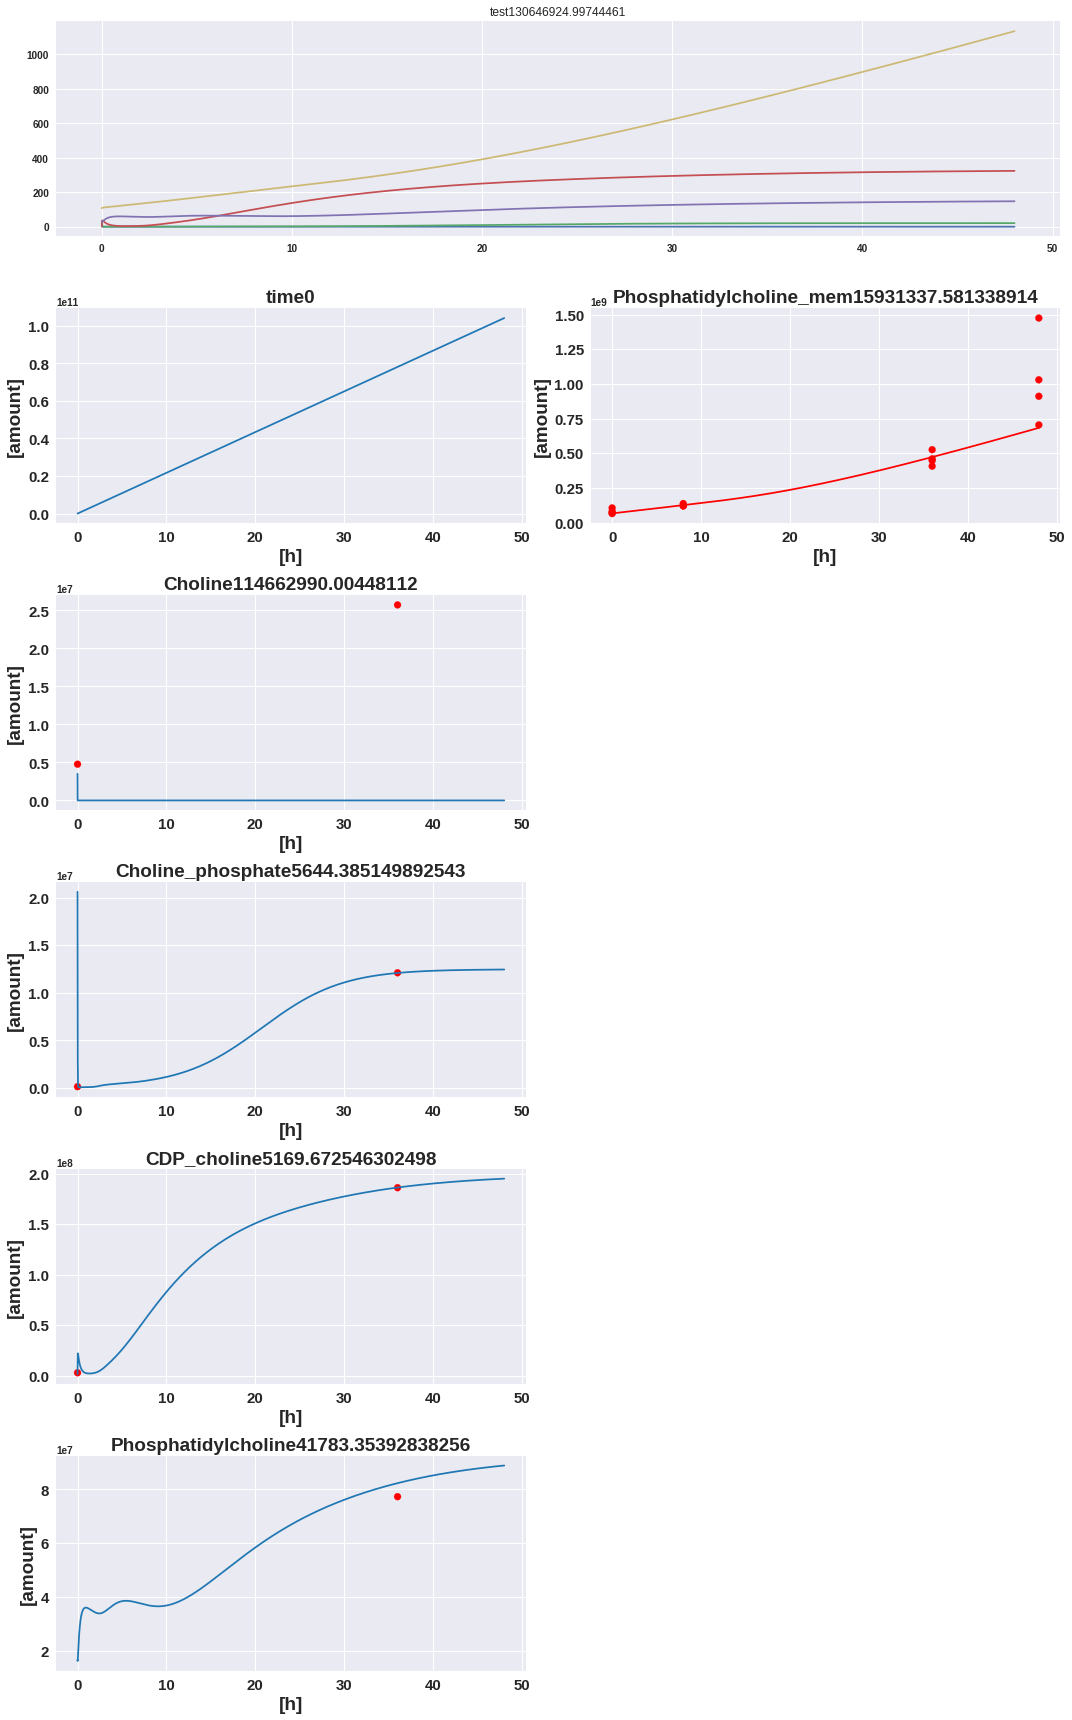

Choline 0 9.018327221987255
Choline 2 136.058441125742
return 114662990.00447474
Choline_phosphate 0 2.993063877033287e-10
Choline_phosphate 2 1.0744828589555458e-06
return 21.608537830725005
CDP_choline 0 17.3931117666229
CDP_choline 2 5844.151532851446
return 3725369806.0359893
Phosphatidylcholine 2 127.9814282367572
return 9954025.145429505
Phosphatidylcholine_mem 0 138.50079870651697
Phosphatidylcholine_mem 1 1.0319185765821934
Phosphatidylcholine_mem 2 0.23139697287835076
Phosphatidylcholine_mem 3 4.6666637364144865
return 38411635.958434545
Value single function: 3888398478.7528663
Phosphatidylcholine 0.9954025145429505
Choline 11.466299000447474
Phosphatidylcholine_mem 3.8411635958434545
CDP_choline 372.5369806035989
Choline_phosphate 2.1608537830725006e-06
Value script function: 3888398478.7528663


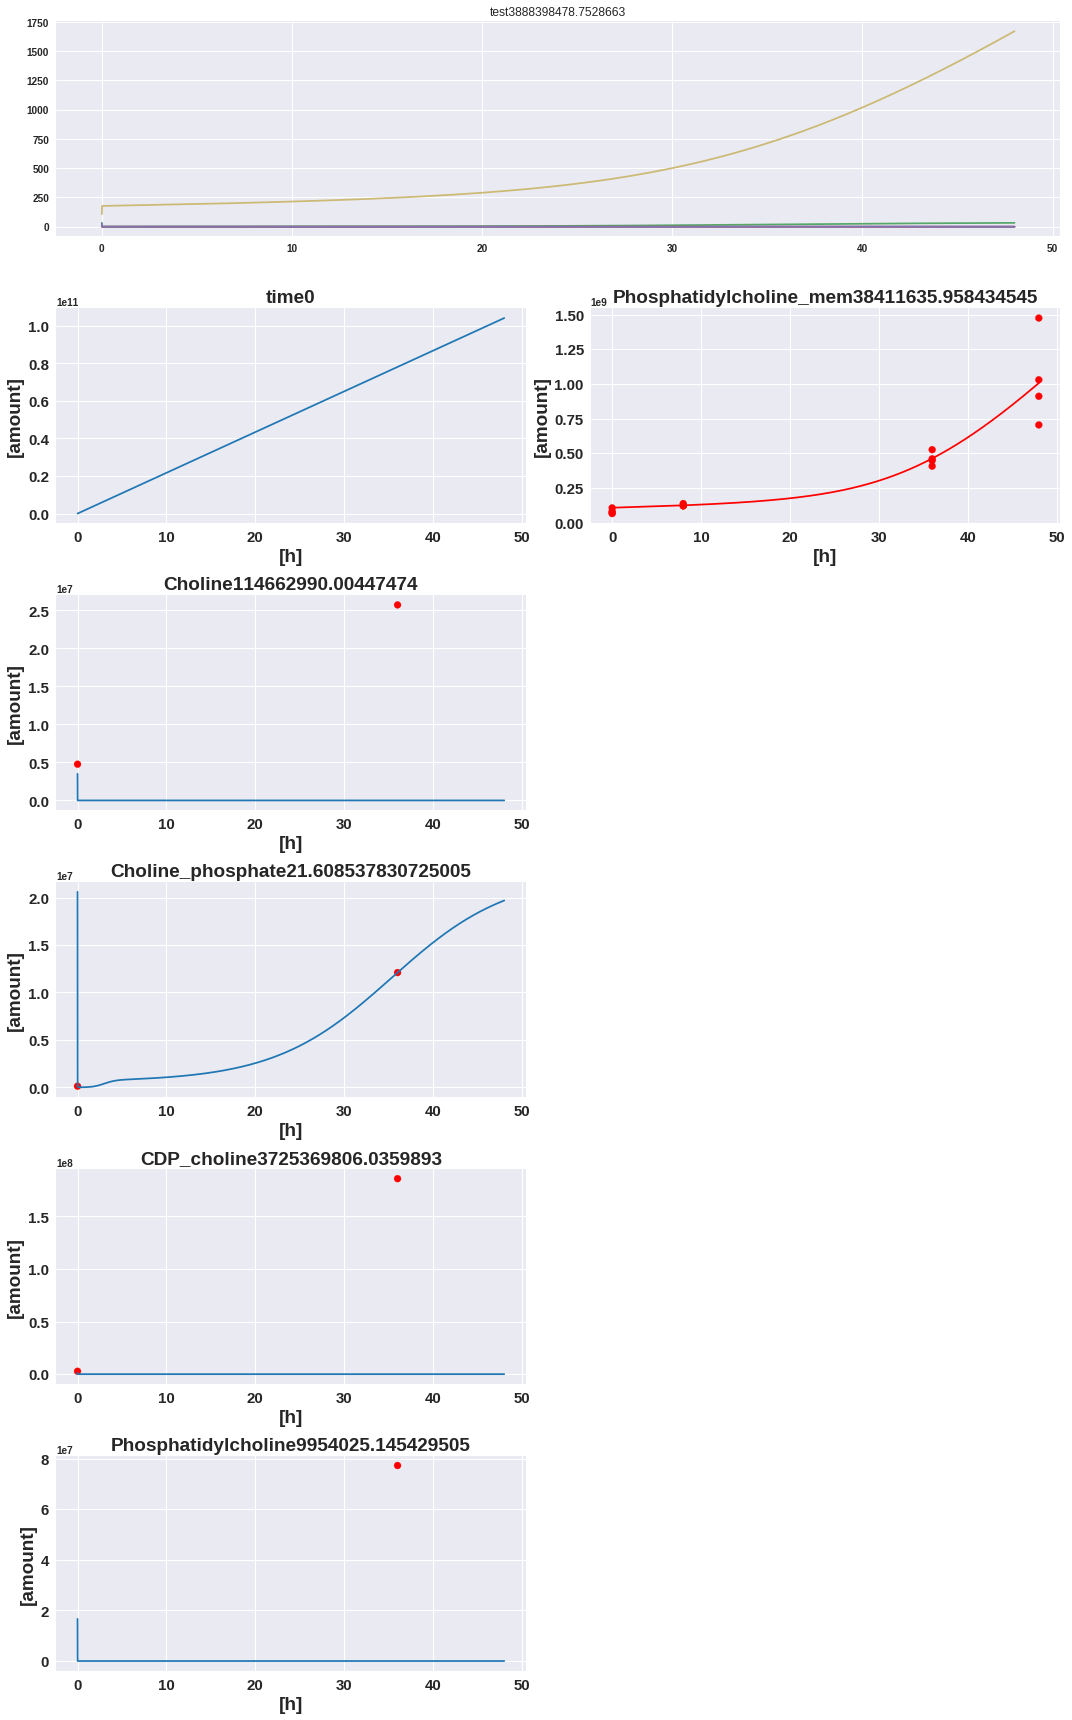

Choline 0 9.018298113704208
Choline 2 136.05834170072882
return 114662873.70954649
Choline_phosphate 0 209.08890510695286
Choline_phosphate 2 274.33971879445477
return 9995220384370.037
CDP_choline 0 17.393027617357465
CDP_choline 2 5844.150465464301
return 3725368450.2420354
Phosphatidylcholine 2 127.98129897011854
return 9954015.091444412
Phosphatidylcholine_mem 0 65333170506.75991
Phosphatidylcholine_mem 1 4831198002612.057
Phosphatidylcholine_mem 2 21830956913141.95
Phosphatidylcholine_mem 3 6000444652879.386
return 5.229911901100531e+18
Value single function: 5.2299219001709e+18
Phosphatidylcholine 0.9954015091444411
Choline 11.46628737095465
Phosphatidylcholine_mem 522991190110.05304
CDP_choline 372.53684502420356
Choline_phosphate 999522.0384370037
Value script function: 5.2299219001709e+18


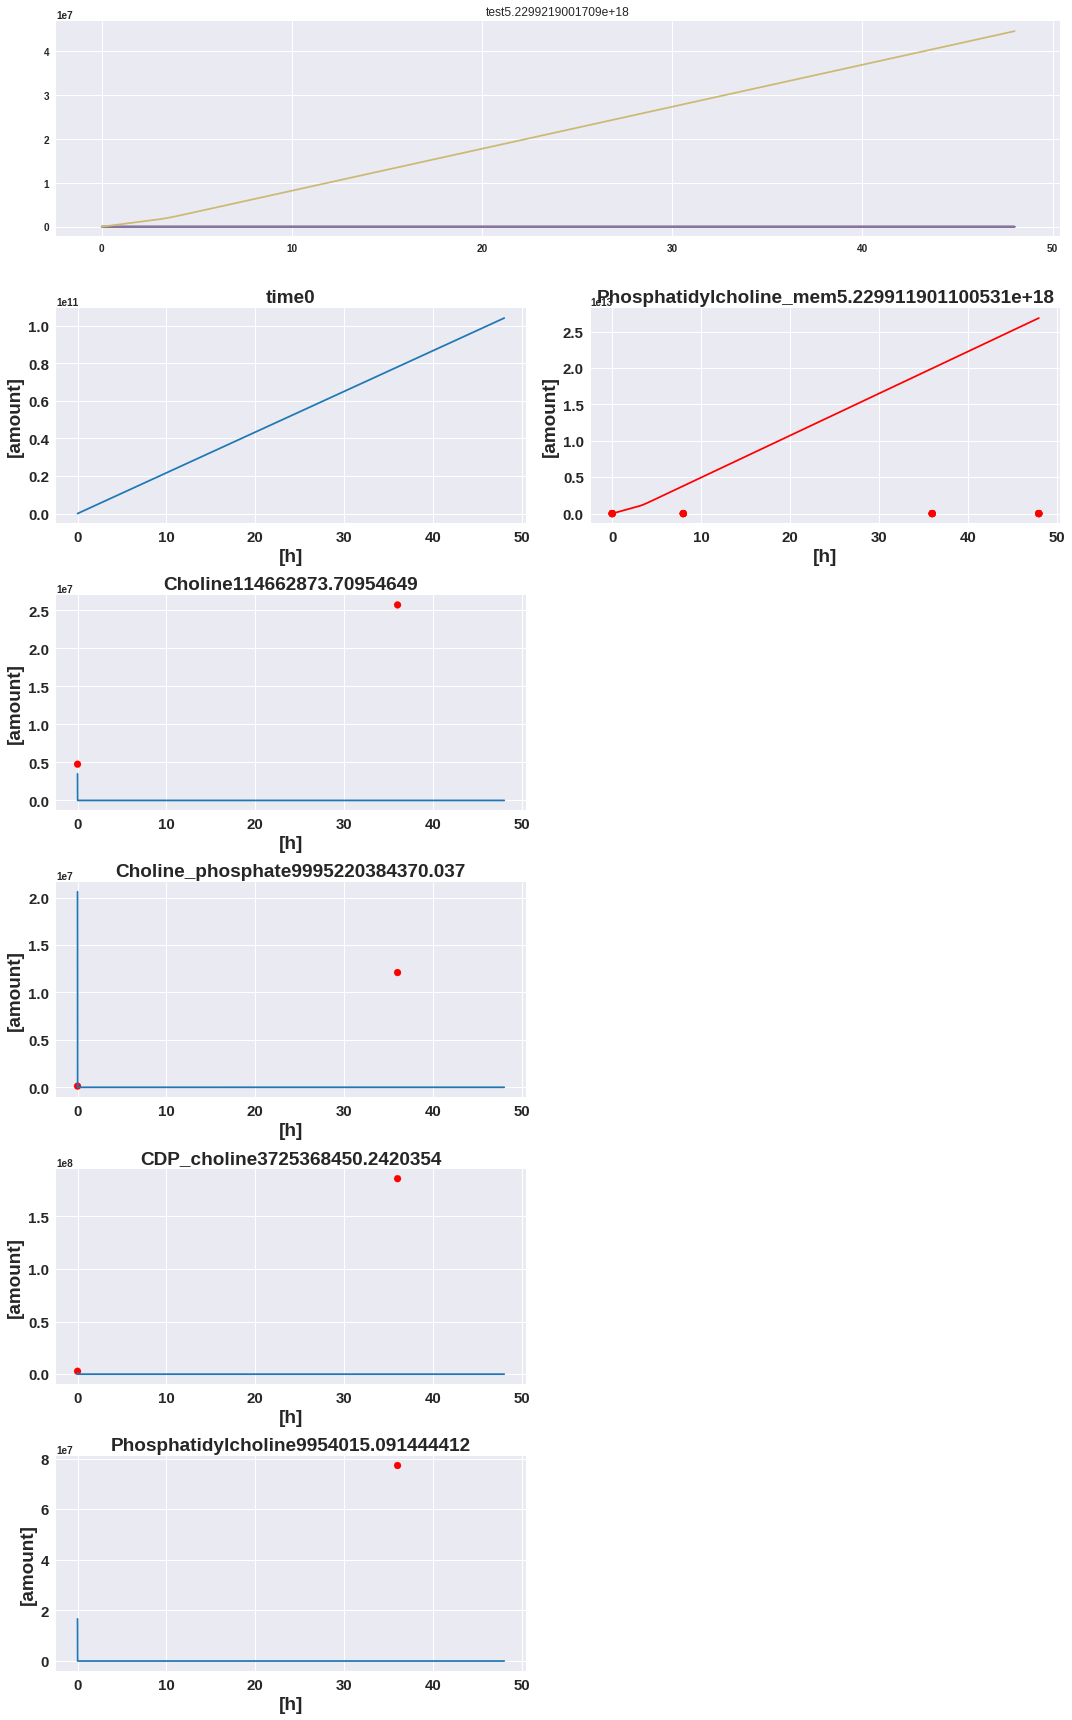

In [11]:
files = os.listdir()

files = [file for file in files if file.endswith('dataplot.txt')]
#files = [file for file in files if file.startswith('2020')]
files= sorted(files)
print(files)
for file in files:
    
    filename = file
    path = datapath
    
    with open(path+filename, 'rb') as g:
        data = pickle.loads(g.read())
    plot_results_df(data, 'test', scatter_dic)   


#path= '20201118-16:14:51dataplot.txt'
#with open(path, 'rb') as g:
    #data1 = pickle.loads(g.read())


In [7]:
n = 4
subfigs=len(files)
if subfigs %n >= 1:
    r=int(np.ceil(subfigs/n))
else:
    r=int(subfigs/n)

nx, ny = (r, n)
print(subfigs%n)
x = np.linspace(0, r-1, nx)

y = np.linspace(0, n-1, ny)
xv, yv = np.meshgrid(x, y)
out = np.column_stack((yv.ravel(),xv.ravel()))
len(out)

2


4

In [12]:
files = os.listdir()
files = [file for file in files if file.endswith('paras.txt')]
#files = [file for file in files if file.startswith('2020')]
files= sorted(files)
#files

In [13]:
df = pd.DataFrame()
for file in files:
    filename = file
    path = datapath
    print(path+ filename)
    with open(path+filename, 'rb') as g:
        data = pickle.loads(g.read())
    dnew = pd.DataFrame.from_dict(data[1], orient='index',columns=['Value'])
    #print(file)
    #print(np.log10(dnew['Value']))
    df[str(data[0])] = dnew['Value']


20210428-14:55:38whole_paras.txt
20210428-21:18:28whole_paras.txt
20210429-10:21:43whole_paras.txt
20210429-14:16:45annealingwhole_paras.txt
20210429-15:35:43cmawhole_paras.txt
20210430-16:47:43whole_paras.txt
20210430-16:56:50whole_paras.txt
20210430-17:19:21whole_paras.txt
20210430-17:26:40whole_paras.txt
20210430-17:34:12whole_paras.txt
20210430-17:44:28whole_paras.txt
20210430-17:50:21whole_paras.txt
20210502-10:47:42cmawhole_paras.txt
20210504-15:49:16cmawhole_paras.txt
20210505-10:51:01whole_paras.txt
20210505-11:02:35whole_paras.txt
20210505-11:24:57whole_paras.txt
20210505-11:38:58whole_paras.txt
20210505-13:51:21whole_paras.txt
20210505-14:29:32whole_paras.txt
20210506-14:49:37whole_paras.txt
20210510-18:46:09whole_paras.txt
20210510-18:46:17whole_paras.txt
20210511-18:09:18whole_paras.txt
20210511-18:09:19whole_paras.txt
20210512-13:46:182whole_paras.txt
20210512-13:46:183whole_paras.txt
20210512-13:46:211whole_paras.txt
20210512-13:46:214whole_paras.txt
20210512-13:46:217who

In [10]:
print(data[1])
#best set 20210502-10:47:42cmawhole_paras.txt

{'cmax_ECholine_in': 0.5548876102963041, 'cmin_ECholine_in': 0.0196375243039834, 't12_ECholine_in': 8251.243015302227, 's_ECholine_in': 1751.825116508778, 'cmax_E2_7_1_32': 8236.310820668714, 'cmin_E2_7_1_32': 9498.725497617592, 't12_E2_7_1_32': 11710.845495009917, 's_E2_7_1_32': 2921.5006190075123, 'cmax_E2_7_7_15': 0.03930636945777464, 'cmin_E2_7_7_15': 838.9560560775792, 't12_E2_7_7_15': 4055.26605603331, 's_E2_7_7_15': 142.15292899231864, 'cmax_E2_7_8_2': 0.1346428189696642, 'cmin_E2_7_8_2': 0.35200728920992336, 't12_E2_7_8_2': 7293.00097925492, 's_E2_7_8_2': 90.4647380533517, 'cmax_EPC_mem': 3352.7180135422113, 'cmin_EPC_mem': 4126.050420037696, 't12_EPC_mem': 6016.598867504951, 's_EPC_mem': 3897.2723758782327, 'k_Choline_in': 0.009774997256559684, 'k_R01021': 15554.2400140754, 'k_R01890': 0.0005971029948834765, 'k_R01321': 0.0026738880453307285, 'k_TransportPC': 8608.284768806981}


In [11]:
def log_trans(param_vec, direction):

    assert direction in [-1, 1]

    if direction == 1:
        param_vec = np.log10(param_vec)
    else:
        param_vec.astype(np.float128)
        param_vec = 10**(param_vec)
        param_vec.astype('double')

    return param_vec

In [15]:
results = list(map(float, df.columns.to_list()))
sorted(results)
df[str(results[-2])]


cmax_ECholine_in        20.004338
cmin_ECholine_in         0.537011
t12_ECholine_in     125892.540636
s_ECholine_in        23719.681668
cmax_E2_7_1_32      294323.087455
cmin_E2_7_1_32       90964.671690
t12_E2_7_1_32       107625.208409
s_E2_7_1_32          14554.587254
cmax_E2_7_7_15           1.440485
cmin_E2_7_7_15         227.794477
t12_E2_7_7_15          531.436081
s_E2_7_7_15           1884.226978
cmax_E2_7_8_2         1329.575024
cmin_E2_7_8_2        38559.574966
t12_E2_7_8_2         65224.157336
s_E2_7_8_2            2704.501502
cmax_EPC_mem         28438.055204
cmin_EPC_mem          5379.822793
t12_EPC_mem         100441.614191
s_EPC_mem             7987.331857
k_Choline_in             0.001008
k_R01021             44994.336076
k_R01890                 0.000533
k_R01321            258931.944401
k_TransportPC        67654.696475
Name: 3888.398478752866, dtype: float64

In [14]:
rows = 4
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
[x for x in coor_list if x[0] != 0]

[array([1., 0.]),
 array([2., 0.]),
 array([3., 0.]),
 array([1., 1.]),
 array([2., 1.]),
 array([3., 1.])]

In [14]:
results = list(map(float, df.columns.to_list()))
sorted(results)

[1.469204748101735e-10,
 3888.398478752866,
 4000.0000002797574,
 4000.00000041228,
 4000.000000508415,
 4000.0000008868974,
 4000.0000013130725,
 4000.0000022805734,
 4000.0000064461988,
 4000.000007596886,
 4000.0000205509477,
 4000.000027621789,
 4000.0000349692327,
 4000.0001076010326,
 4000.0244569241304,
 4005.1045951625715,
 4242.158986807257,
 26901.456696409947,
 62064.934561995375,
 232781.45294570553,
 873719.5781634274,
 3745480.7123134346,
 6457243.30411441,
 10010925.760626273,
 11339463.37425779,
 11915803.332435004,
 12023319.888443312,
 13809239.13378565,
 15576784.844001407,
 15758047.622888193,
 16670962.092582453,
 18167083.53778422,
 18219309.247827303,
 18493246.261973713,
 18515177.448707327,
 18526460.82475742,
 18527458.42165665,
 18527460.522360425,
 18527460.847893097,
 18527460.870747212,
 18527460.877049394,
 20003999.99743402,
 20003999.999984603,
 20004000.000001624,
 20004000.000002705,
 20004177.234898183,
 20004416.9410177,
 54429320.92744938,
 5795670

{'cmax_ECholine_in': 155.16227852872328, 'cmin_ECholine_in': 88.7056701289355, 't12_ECholine_in': 11997.693519201968, 's_ECholine_in': 950.574557487302, 'cmax_E2_7_1_32': 68471.65455800155, 'cmin_E2_7_1_32': 923.9361010834247, 't12_E2_7_1_32': 5635.967437093784, 's_E2_7_1_32': 1868.1067240101333, 'cmax_E2_7_7_15': 50.80908265813534, 'cmin_E2_7_7_15': 2659.0968655303827, 't12_E2_7_7_15': 1524.7994682460605, 's_E2_7_7_15': 8750.705292667284, 'cmax_E2_7_8_2': 1762.8300427086888, 'cmin_E2_7_8_2': 3451.937296038737, 't12_E2_7_8_2': 6939.871590883227, 's_E2_7_8_2': 5079.6476349919485, 'cmax_EPC_mem': 1826.8583209962424, 'cmin_EPC_mem': 406.86403811727183, 't12_EPC_mem': 4080.9806577645295, 's_EPC_mem': 6185.232437523808, 'k_Choline_in': 1.2041121639017924, 'k_R01021': 249.07284414308435, 'k_R01890': 2322.3752169725585, 'k_R01321': 5348.303100736988, 'k_TransportPC': 2246.971642384853}
Choline 0 9.018298113763818
Choline 2 136.05834170072882
return 114662873.70963255
Choline_phosphate 0 209.0

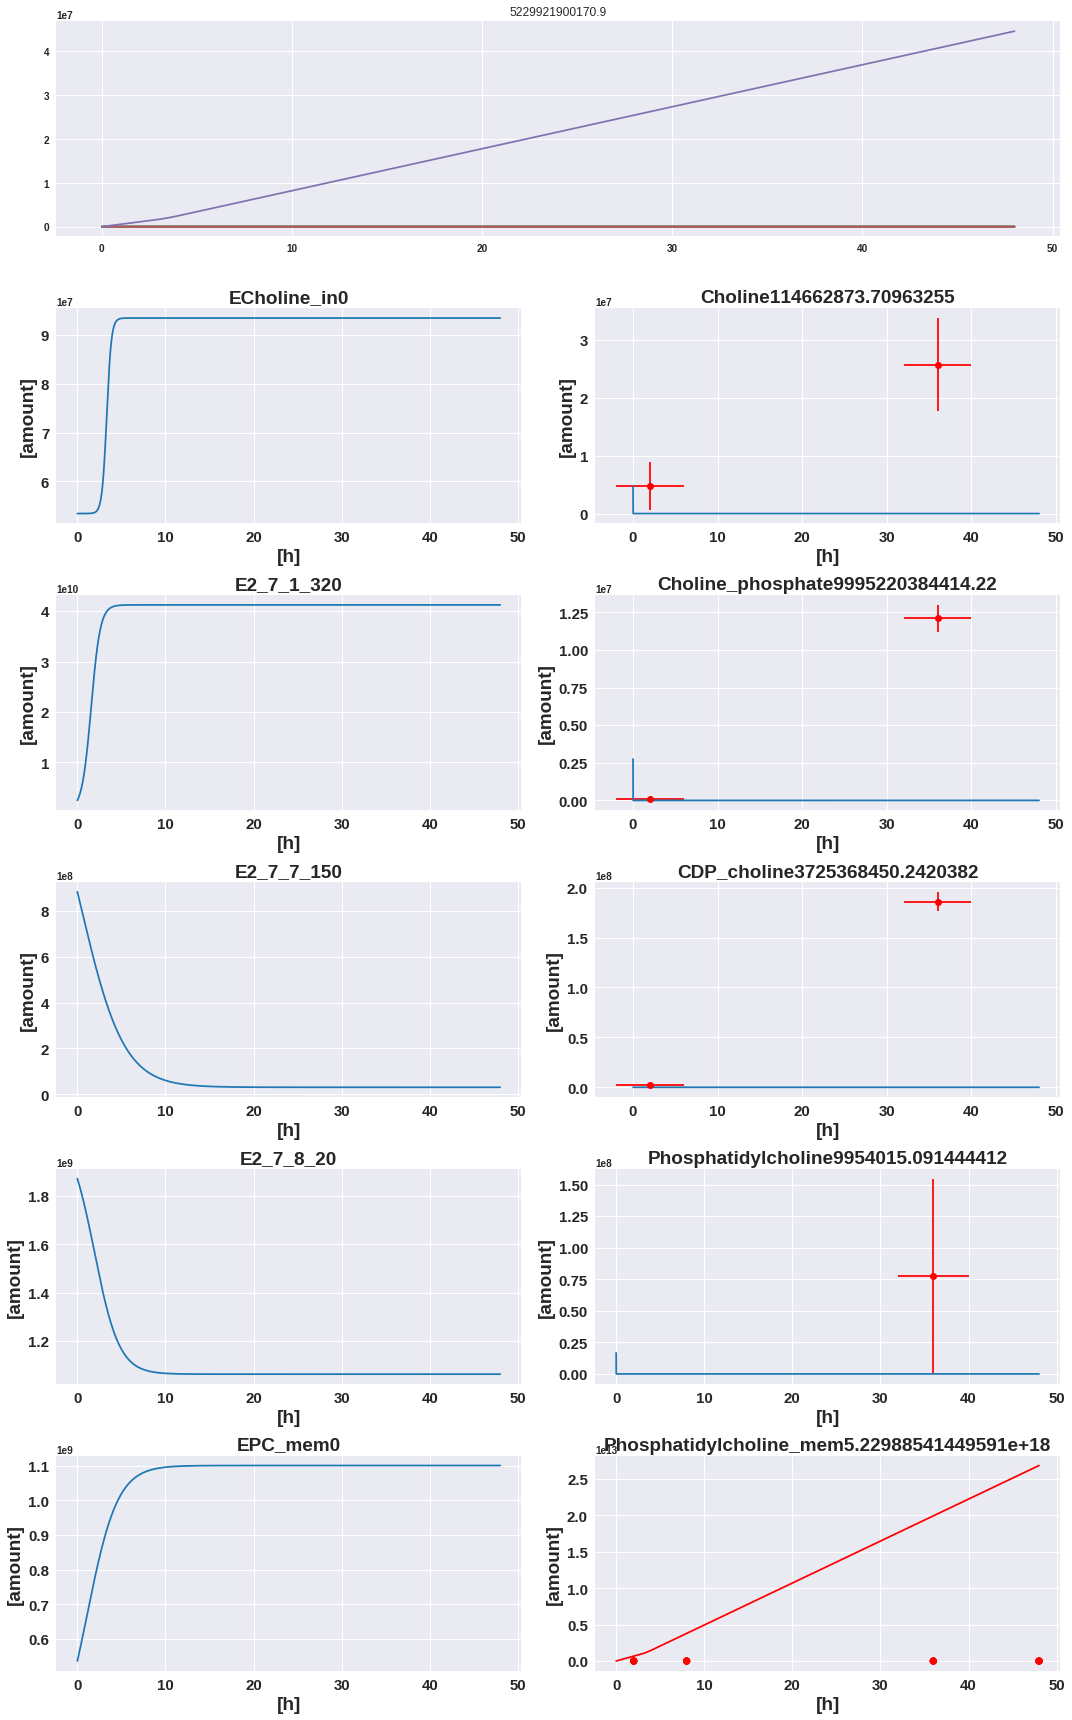

{'cmax_ECholine_in': 20.004338160128203, 'cmin_ECholine_in': 0.537011280542449, 't12_ECholine_in': 125892.54063612854, 's_ECholine_in': 23719.68166751971, 'cmax_E2_7_1_32': 294323.08745512, 'cmin_E2_7_1_32': 90964.67169029114, 't12_E2_7_1_32': 107625.20840928839, 's_E2_7_1_32': 14554.587254245653, 'cmax_E2_7_7_15': 1.4404853841462295, 'cmin_E2_7_7_15': 227.79447718957533, 't12_E2_7_7_15': 531.4360806954384, 's_E2_7_7_15': 1884.2269782543715, 'cmax_E2_7_8_2': 1329.5750241668384, 'cmin_E2_7_8_2': 38559.57496581415, 't12_E2_7_8_2': 65224.157336161064, 's_E2_7_8_2': 2704.501502020663, 'cmax_EPC_mem': 28438.05520386425, 'cmin_EPC_mem': 5379.822792727452, 't12_EPC_mem': 100441.61419116028, 's_EPC_mem': 7987.3318574473415, 'k_Choline_in': 0.001007870488335283, 'k_R01021': 44994.33607577724, 'k_R01890': 0.0005334047467735103, 'k_R01321': 258931.9444014269, 'k_TransportPC': 67654.69647454844}
Choline 0 9.018327221987255
Choline 2 136.058441125742
return 114662990.00447474
Choline_phosphate 0 1.

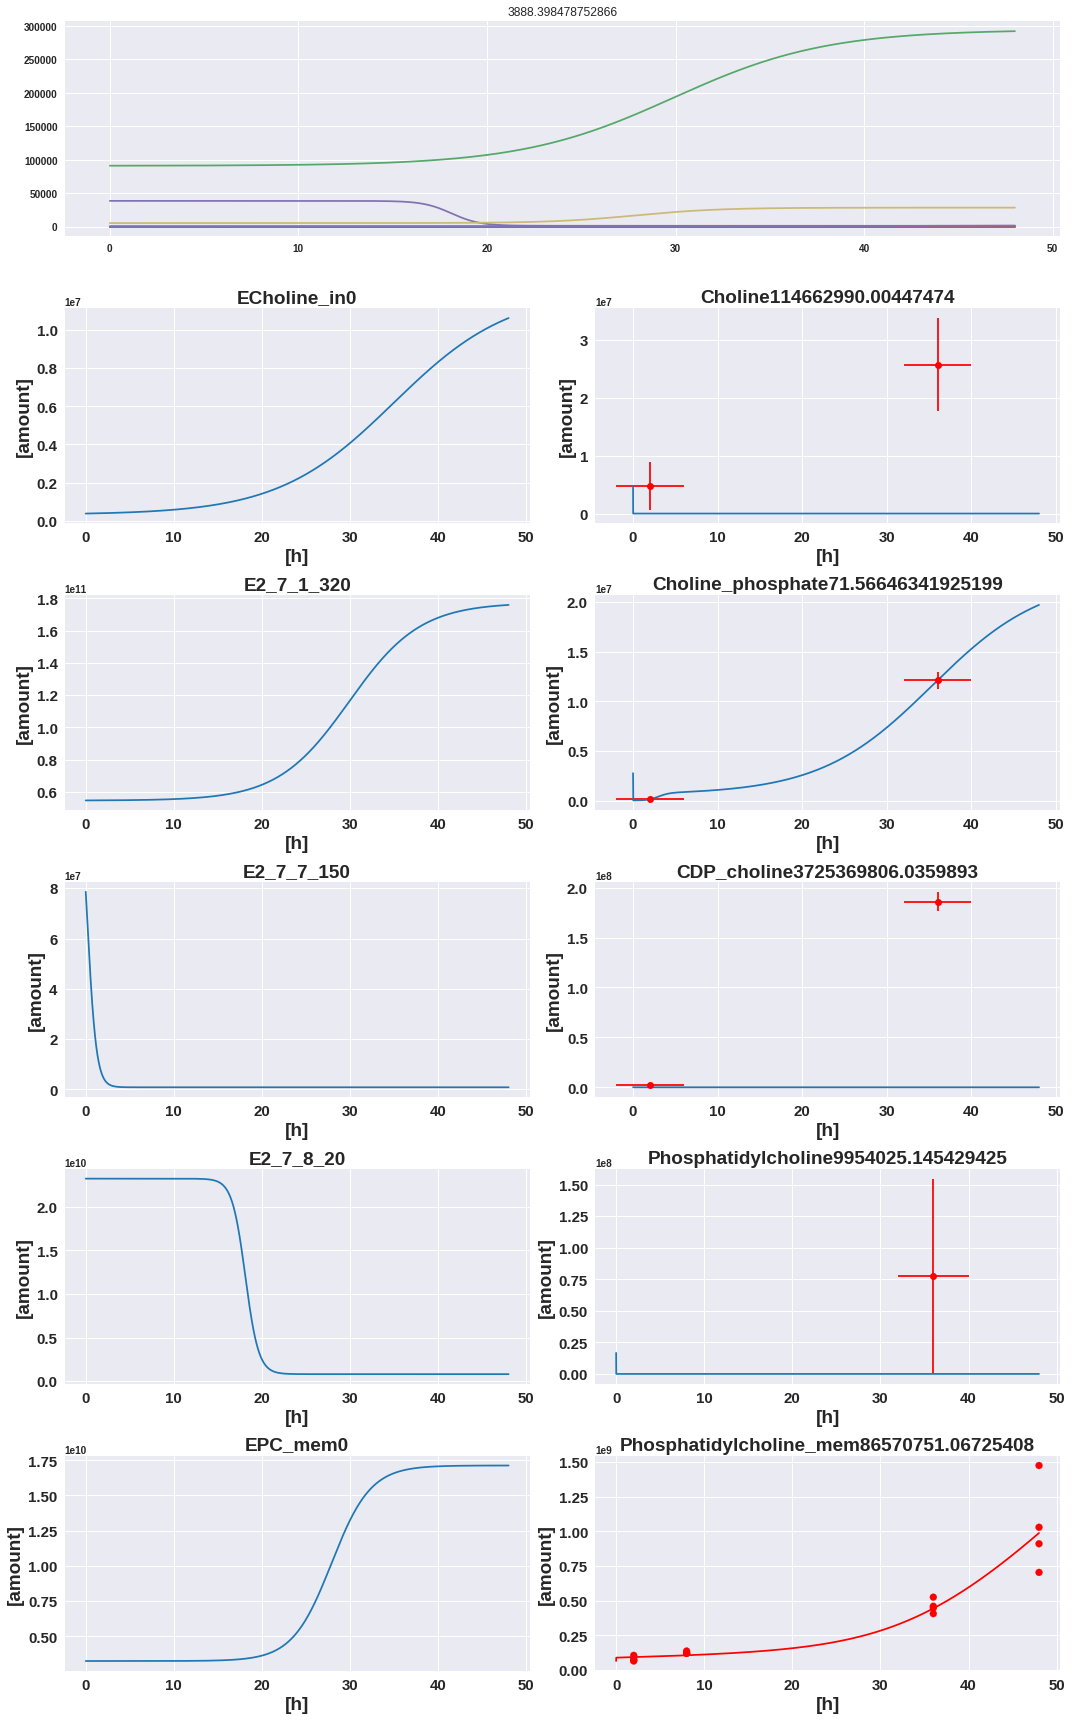

{'cmax_ECholine_in': 6.727030157560687e-06, 'cmin_ECholine_in': 1.665344880862202e-06, 't12_ECholine_in': 8679.01052398277, 's_ECholine_in': 1278.670310432233, 'cmax_E2_7_1_32': 280021.8363063189, 'cmin_E2_7_1_32': 23050.37149781162, 't12_E2_7_1_32': 2732.1333102226586, 's_E2_7_1_32': 9713.436713203388, 'cmax_E2_7_7_15': 1.4834989649028163, 'cmin_E2_7_7_15': 152.2444191889881, 't12_E2_7_7_15': 853.0468809559301, 's_E2_7_7_15': 15663.569116308463, 'cmax_E2_7_8_2': 0.0004295915825018367, 'cmin_E2_7_8_2': 0.022748140134466046, 't12_E2_7_8_2': 5172.745343814749, 's_E2_7_8_2': 4296.3650043601765, 'cmax_EPC_mem': 0.01994254172106311, 'cmin_EPC_mem': 0.7876512481168676, 't12_EPC_mem': 29.91298073060844, 's_EPC_mem': 56.81211163063641, 'k_Choline_in': 909.8023110151832, 'k_R01021': 315123.9943508073, 'k_R01890': 0.0002836433926724884, 'k_R01321': 0.06125381037230199, 'k_TransportPC': 0.0028456089795732623}
Choline 0 9.018327221987645
Choline 2 136.05844112575008
return 114662990.00448132
Choli

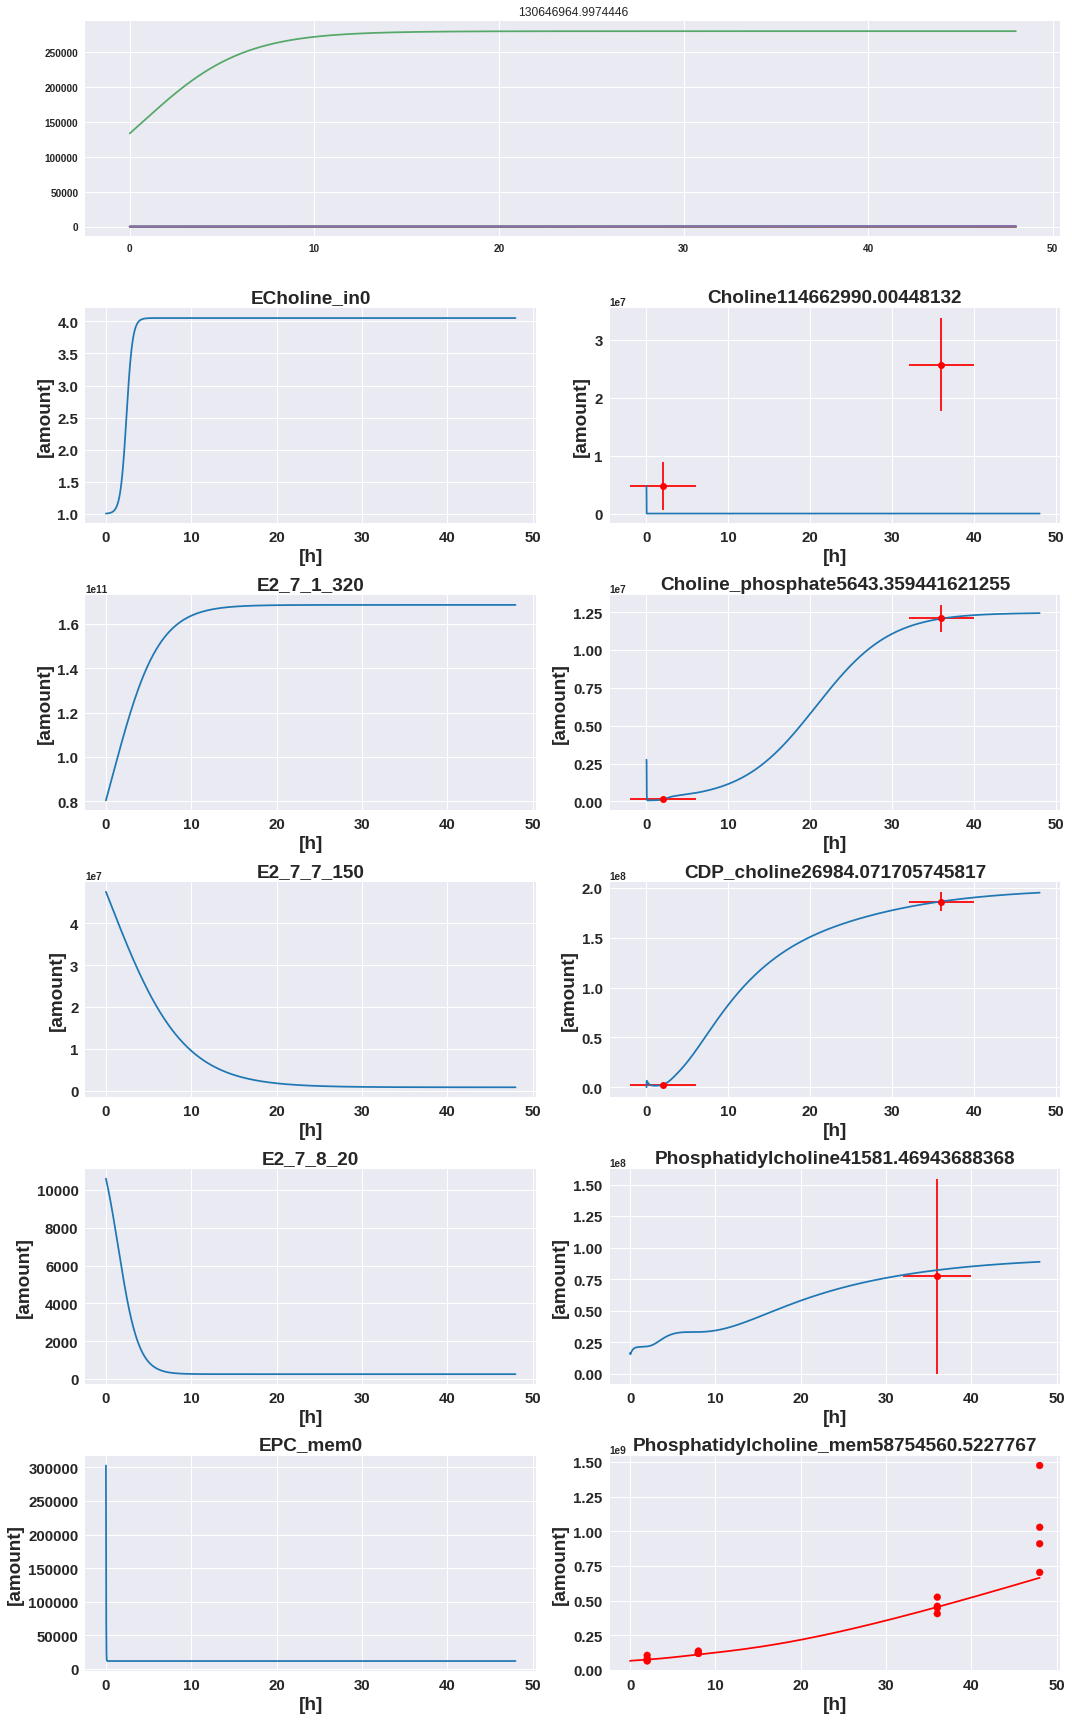

{'cmax_ECholine_in': 0.5548876102963041, 'cmin_ECholine_in': 0.0196375243039834, 't12_ECholine_in': 8251.243015302227, 's_ECholine_in': 1751.825116508778, 'cmax_E2_7_1_32': 8236.310820668714, 'cmin_E2_7_1_32': 9498.725497617592, 't12_E2_7_1_32': 11710.845495009917, 's_E2_7_1_32': 2921.5006190075123, 'cmax_E2_7_7_15': 0.03930636945777464, 'cmin_E2_7_7_15': 838.9560560775792, 't12_E2_7_7_15': 4055.26605603331, 's_E2_7_7_15': 142.15292899231864, 'cmax_E2_7_8_2': 0.1346428189696642, 'cmin_E2_7_8_2': 0.35200728920992336, 't12_E2_7_8_2': 7293.00097925492, 's_E2_7_8_2': 90.4647380533517, 'cmax_EPC_mem': 3352.7180135422113, 'cmin_EPC_mem': 4126.050420037696, 't12_EPC_mem': 6016.598867504951, 's_EPC_mem': 3897.2723758782327, 'k_Choline_in': 0.009774997256559684, 'k_R01021': 15554.2400140754, 'k_R01890': 0.0005971029948834765, 'k_R01321': 0.0026738880453307285, 'k_TransportPC': 8608.284768806981}
Choline 0 9.018327221941707
Choline 2 136.05844112536647
return 114662990.00412843
Choline_phosphate

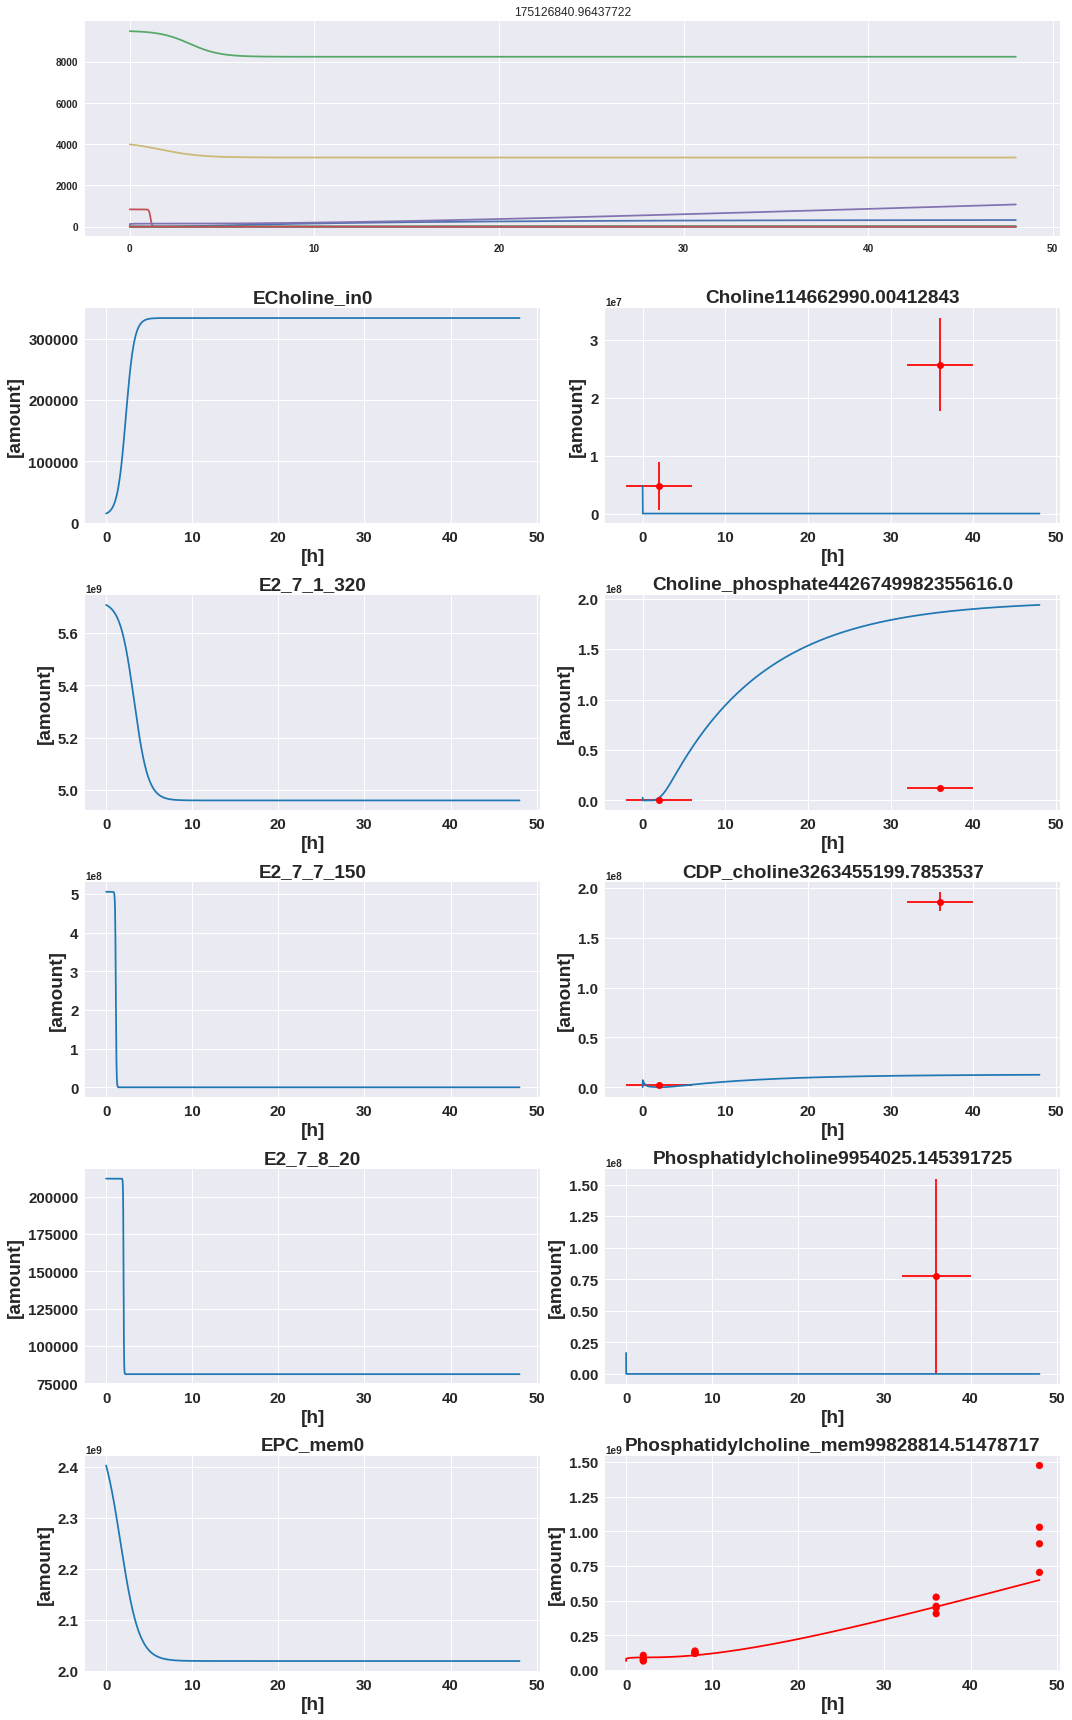

{'cmax_ECholine_in': 4.754086979302289, 'cmin_ECholine_in': 21486.05372081688, 't12_ECholine_in': 99818.66230446984, 's_ECholine_in': 115.71409210343825, 'cmax_E2_7_1_32': 0.2666440466576982, 'cmin_E2_7_1_32': 21.488212586672987, 't12_E2_7_1_32': 52.67983340199404, 's_E2_7_1_32': 18.786154231994825, 'cmax_E2_7_7_15': 21.13375469142049, 'cmin_E2_7_7_15': 12541.780488264149, 't12_E2_7_7_15': 10702.910538700944, 's_E2_7_7_15': 82.16947812118816, 'cmax_E2_7_8_2': 21146.13237129532, 'cmin_E2_7_8_2': 7.86191966444522, 't12_E2_7_8_2': 777.4658985981506, 's_E2_7_8_2': 140.2050902102353, 'cmax_EPC_mem': 0.020387961653036066, 'cmin_EPC_mem': 0.814533031969859, 't12_EPC_mem': 142.18917470813338, 's_EPC_mem': 23.375927914074403, 'k_Choline_in': 2.50668325126039e-07, 'k_R01021': 0.00568849023463451, 'k_R01890': 2.921269181721641e-06, 'k_R01321': 3.762587361341896, 'k_TransportPC': 0.0016118796077466931}
Choline 0 1.1727066688512642
Choline 2 136.0513107589468
return 103332585.47002324
Choline_phosp

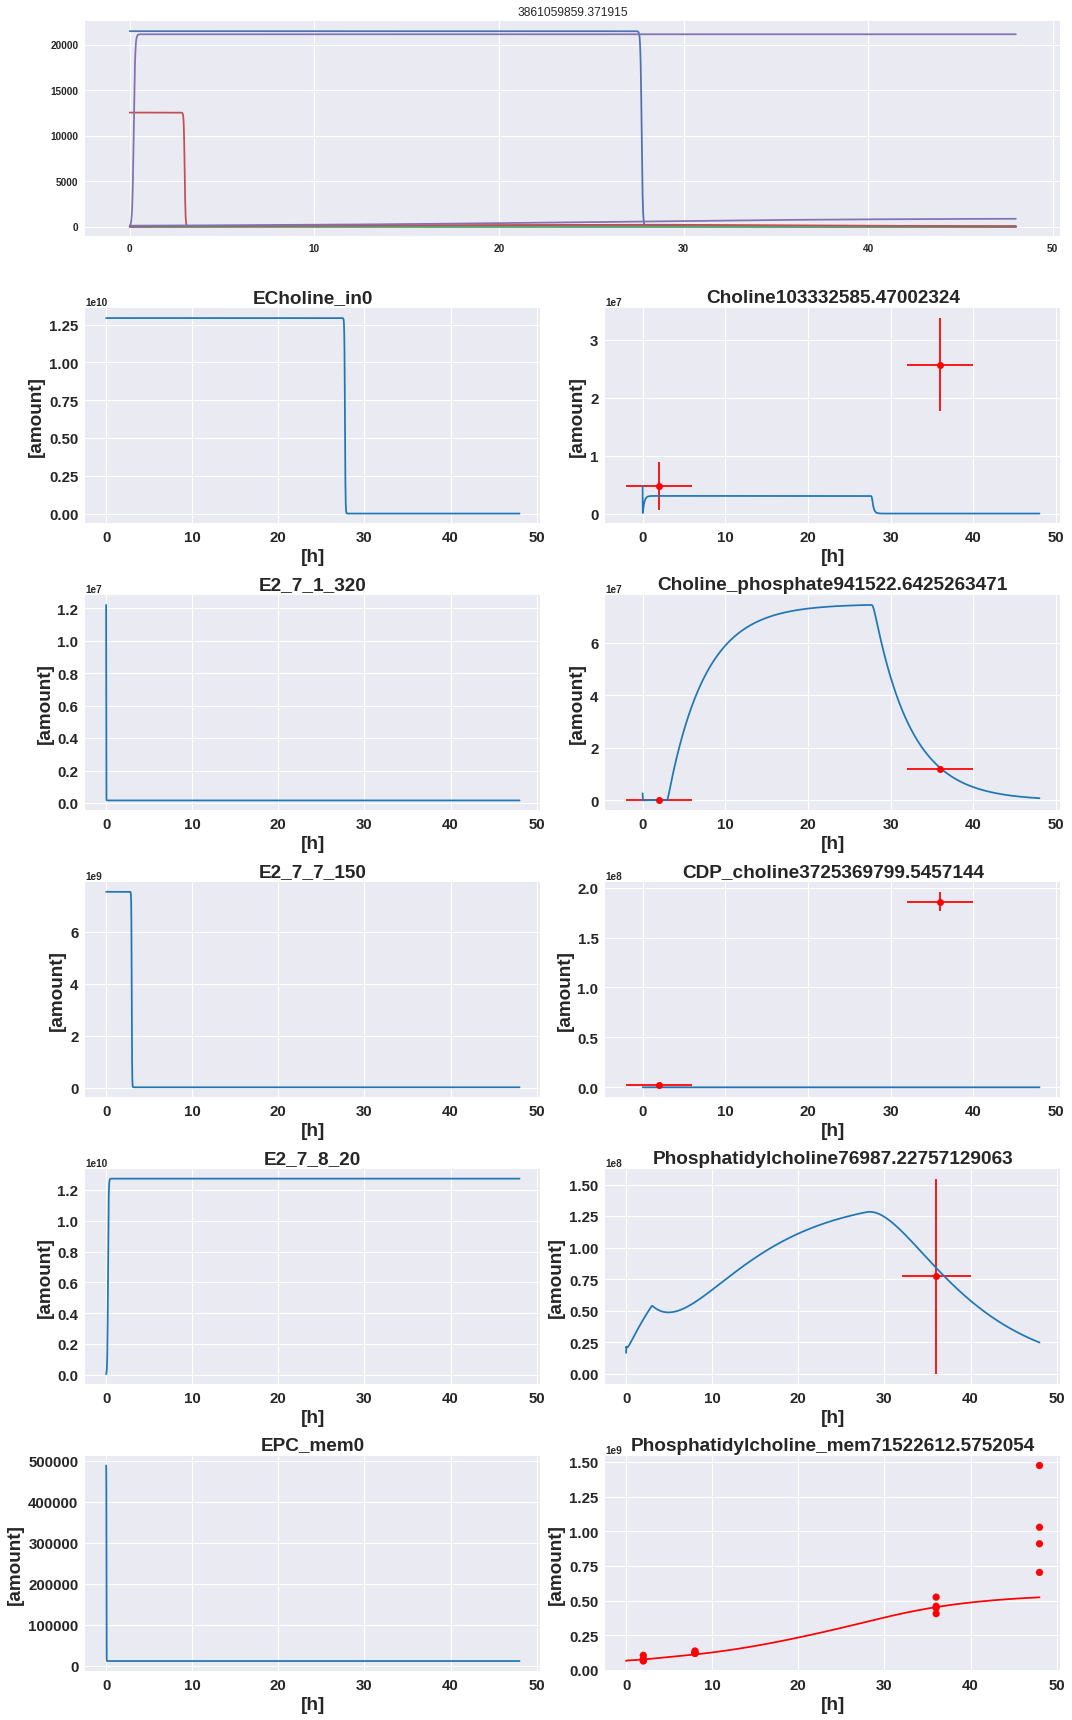

In [16]:
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]


results = list(map(float, df.columns.to_list()))
model = te.loada(modelpath)
i = 0
break_num = 5
for esti in results[::-1]:
    if i == break_num:
        break
    i+=1
    model.resetToOrigin()
    model = set_model_parameters(model, df[str(esti)].to_dict())
    print(df[str(esti)].to_dict())
    enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
    selections = enzymes + model.getFloatingSpeciesIds()
    # how selctions is used here floating species in mol
    model.selections = ['time']+selections

    #model.selections = ['time']+selections
    try:
        model_res = model.simulate(0, 48 * 3600, 3600)
    
    except:
        print(esti,' not working')
        continue
        
    res = simulation_to_panda(model_res)
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])

    summe = 0
    for it,col in enumerate(selections):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        
        sqd_dis = 0
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance_single(col, res_dic, scatter_dic)
            summe += sqd_dis
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount
            
            ax2.scatter([2, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')
        
            ax2.scatter([2, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
                scatter_std = np.asarray(scatter_dic[col]['std']) * Alex_to_amount
                ax2.errorbar(x=[2,8,129600/3600,172800/3600], y=scatter_amount,
                             xerr=4,
                             yerr= scatter_std, fmt='o', color='red')
            
        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)
        
        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
   
    
    print(f'Value script function: {compute_sqd_distance(res_dic, scatter_dic)}')
    print(f'Score estimation: {esti}')
    print('Value_single_func/estimation_Score:',summe/esti)
    print(f'Value single function: {summe}')
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()

In [ ]:
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]


results = list(map(float, df.columns.to_list()))
model = te.loada(modelpath)
i = 0
for esti in results[:]:
    if i == len(results):
        break
    i+=1
    model.resetToOrigin()
    model = set_model_parameters(model, df[str(esti)].to_dict())
    
    enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
    selections = enzymes + model.getFloatingSpeciesIds()
    # how selctions is used here floating species in mol
    model.selections = ['time']+selections

    #model.selections = ['time']+selections
    try:
        model_res = model.simulate(0, 48 * 3600, 3600)
    
    except:
        print(esti,' not working')
        continue
        
    res = simulation_to_panda(model_res)
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])

    summe = 0
    for it,col in enumerate(selections):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        
        sqd_dis = 0
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance_single(col, res_dic, scatter_dic)
            summe += sqd_dis
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount
            
            ax2.scatter([2, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')
        
            ax2.scatter([2, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([2, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
                scatter_std = np.asarray(scatter_dic[col]['std']) * Alex_to_amount
                ax2.errorbar(x=[2,8,129600/3600,172800/3600], y=scatter_amount,
                             xerr=4,
                             yerr= scatter_std, fmt='o', color='red')
            
        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)
        
        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
   
    
    print(f'Value script function: {compute_sqd_distance(res_dic, scatter_dic)}')
    print(f'Score estimation: {esti}')
    print('New_Score/estimation_Score:',summe/esti)
    print(f'Value single function: {summe}')
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()

3.0380521770122857

Index(['20004416.9410177', '3.761798568689031e+37', '79502041.01546007',
       '80247227.64283654', '3745480.7123134346', '62090270.35641192',
       '69203851.73454706', '78526680.8648865', '78526602.65312804',
       '57956702.49510242', '69202851.73458979', '61318144.68549356',
       '26901.456696409947', '232781.45294570553', '54429320.92744938',
       '64425744.70099634', '69202851.73438115', '62684193.42958498',
       '13809239.13378565', '15758047.622888193', '16670962.092582453',
       '4000.0000064461988', '4000.0244569241304', '12023319.888443312',
       '18167083.53778422', '4000.0000002797574', '18527460.847893097',
       '18515177.448707327', '4000.0000349692327', '11915803.332435004',
       '18527460.877049394', '6457243.30411441', '10010925.760626273',
       '20004177.234898183', '4000.0000022805734', '62064.934561995375',
       '4242.158986807257', '873719.5781634274', '4000.0000013130725',
       '4000.0001076010326', '18527460.870747212', '15576784.844001407

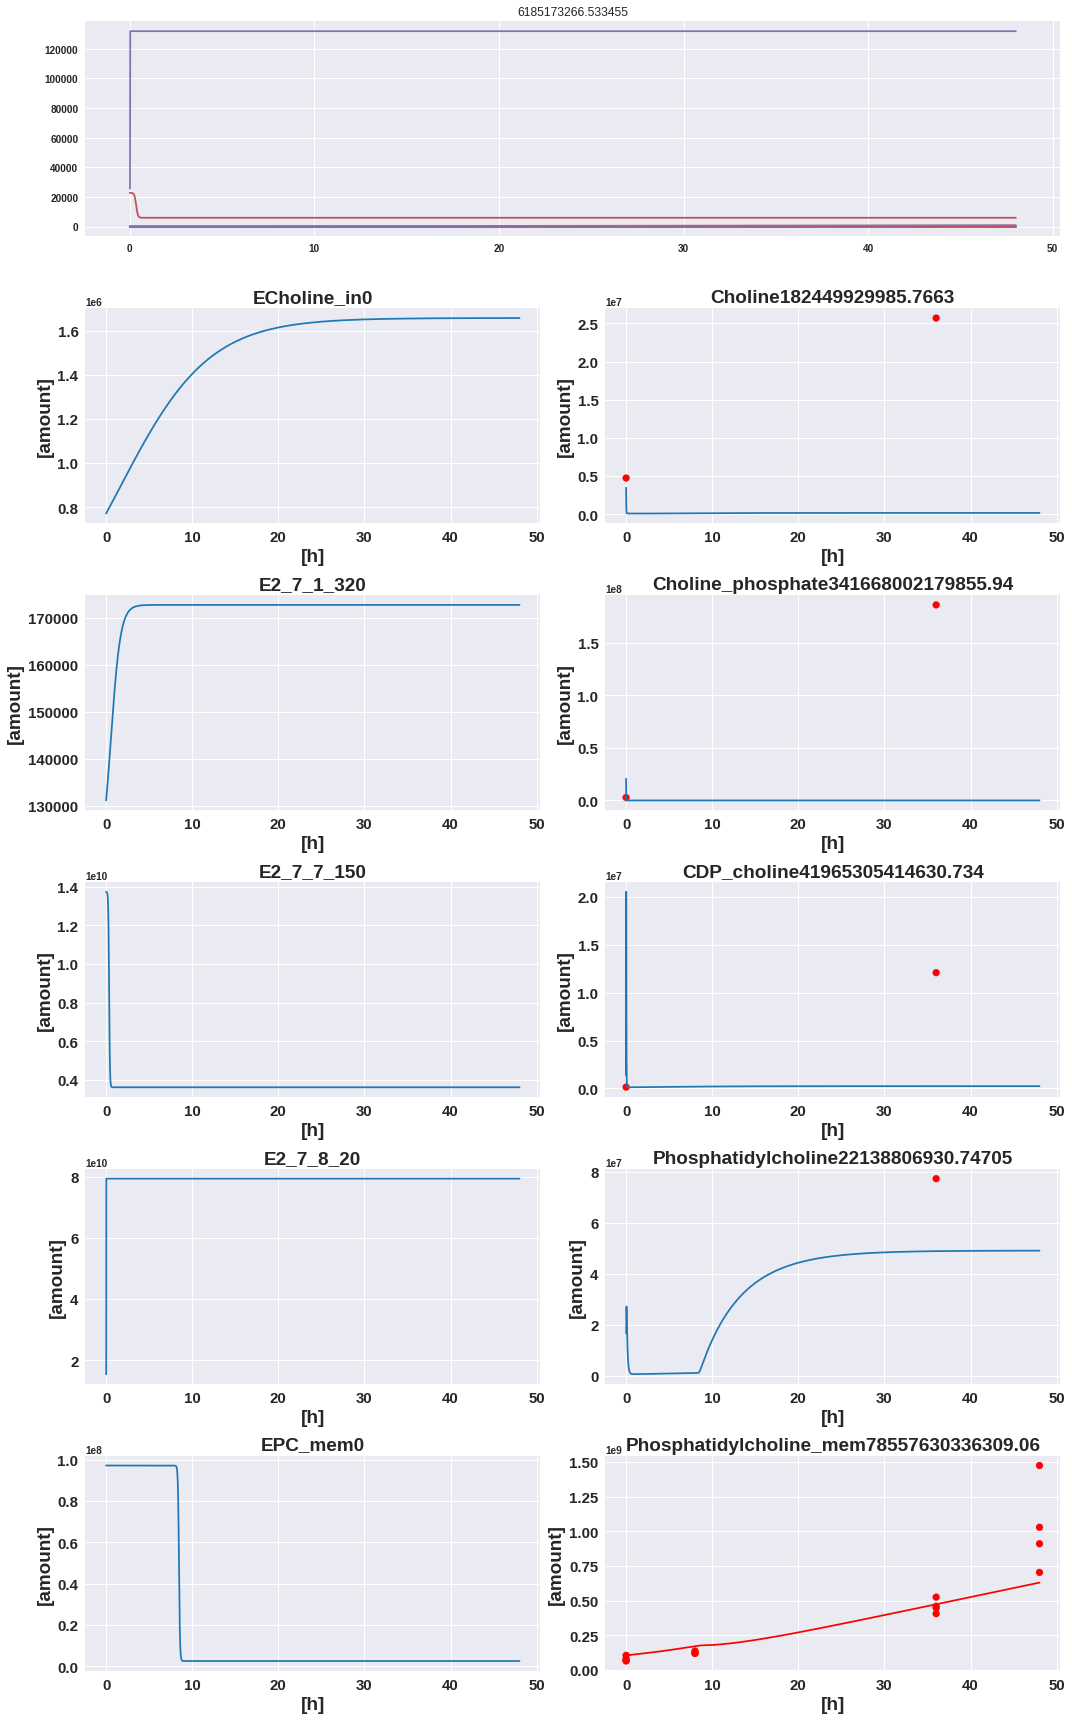

In [29]:
rows = 6
ncol= 2
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]


results = list(map(float, df.columns.to_list()))
model = te.loada(modelpath)
i = 0
for esti in results[-1:]:
    if i == 5:
        break
    i+=1
    model.resetToOrigin()
    model = set_model_parameters(model, df[str(esti)].to_dict())
    
    enzymes = [x for x in model.getGlobalParameterIds() if x.startswith('E')]
    selections = enzymes + model.getFloatingSpeciesIds()
    # how selctions is used here floating species in mol
    model.selections = ['time']+selections

    #model.selections = ['time']+selections
    try:
        model_res = model.simulate(0, 48 * 3600, 3600)
    
    except:
        print(esti,' not working')
        continue
    res = simulation_to_panda(model_res)
    res_dic = simulation_to_dict(res)
    # floating species have to be divided by volume to be in M
    fig = plt.figure(figsize=(15,24))

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)

    ax1.set_title(esti)
    ax1.plot(res['time']/3600,res.iloc[:,1:])


    for it,col in enumerate(selections):
        plt.style.use('seaborn')
        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        
        sqd_dis = 0
        if col in scatter_dic:
            sqd_dis = compute_sqd_distance(col, res_dic, scatter_dic)
        
        if col == 'Phosphatidylcholine_mem':
            color = 'r'
            alex_data = np.array([133.0, 208.0, 763.0, 1709.0]) * Alex_to_amount
            alex1 = np.array([107.29, 227.37, 674.67, 1511.67]) * Alex_to_amount
            alex2 = np.array([117.19, 199.33, 742.31, 2448.40]) * Alex_to_amount
            alex3 = np.array([175.31, 198.61, 872.10, 1168.42]) * Alex_to_amount
            
            ax2.scatter([0, 8,129600/3600,172800/3600], alex_data, 
                        color='red',linestyle='--', label='PC')
        
            ax2.scatter([0, 8,129600/3600,172800/3600], alex1, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex2, 
                        color='red',linestyle='--', label='PC')
            ax2.scatter([0, 8,129600/3600,172800/3600], alex3, 
                        color='red',linestyle='--', label='PC')
        elif col in scatter_dic:
                scatter_amount = np.asarray(scatter_dic[col]['mean']) * Alex_to_amount
                ax2.scatter([0,8,129600/3600,172800/3600], scatter_amount,
                           color='red',linestyle='--')
            
        ax2.tick_params(axis='both', which='major', labelsize=MEDIUM_SIZE)
        
        ax2.plot(res['time']/3600,res[col] * Alex_to_amount, color=color)
        ax2.set_title(col+str(sqd_dis),fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_ylabel('[amount]',fontsize=BIGGER_SIZE,fontweight='bold')
        ax2.set_xlabel('[h]',fontsize=BIGGER_SIZE,fontweight='bold')
        
    plt.tight_layout()   
    #plt.savefig(esti+'.png', format="png")
    plt.show()
    plt.close()

In [36]:
model = te.loada(modelpath)
model.getGlobalParameterIds()
a = model.getGlobalParameterIds()
b = np.random.rand(len(a))

dic = dict(zip(a,b))

dic = {i:dic[i] for i in dic if not i.startswith('E')}  
try:
    dic.pop('t')
    dic.pop('Vmax')
    dic.pop('Vmin')
    dic.pop('t12')
    dic.pop('s')
except:
    pass

with open('to_fit_para.txt', 'wb') as handle:
        pickle.dump(dic, handle)
dic

{'cmax_ECholine_in': 0.07814970107015917,
 'cmin_ECholine_in': 0.8646098559741218,
 't12_ECholine_in': 0.036723942021083755,
 's_ECholine_in': 0.13208608702159674,
 'cmax_E2_7_1_32': 0.555566040919131,
 'cmin_E2_7_1_32': 0.9192911169727633,
 't12_E2_7_1_32': 0.5244217909737345,
 's_E2_7_1_32': 0.0268035095413397,
 'cmax_E2_7_7_15': 0.2177274363550492,
 'cmin_E2_7_7_15': 0.35672777226762287,
 't12_E2_7_7_15': 0.8366376444646997,
 's_E2_7_7_15': 0.7204399399194952,
 'cmax_E2_7_8_2': 0.008484898369436666,
 'cmin_E2_7_8_2': 0.627090943874926,
 't12_E2_7_8_2': 0.8081123729141176,
 's_E2_7_8_2': 0.02926534921372037,
 'cmax_EPC_mem': 0.795110696718613,
 'cmin_EPC_mem': 0.3203791703698351,
 't12_EPC_mem': 0.989841417679998,
 's_EPC_mem': 0.5357557814695596,
 'k_Choline_in': 0.8960895840928859,
 'k_R01021': 0.06496207718806668,
 'k_R01890': 0.5830727931579215,
 'k_R01321': 0.7282929564274685,
 'k_TransportPC': 0.8743954066730036}

# Part to make parameter dict for PC+PE Pathway
 

In [15]:
def set_model_parameters(model, params, excluded_values=[]):
    no_names = excluded_values
    for param_id in params:
        if any(x in param_id for x in no_names):
            continue
        else:
            try:
                model[param_id] = params[param_id]
                print(param_id)
                # print(model[param_id])
            except RuntimeError:
                print('could not set parameter : {0}'.format(param_id))
            except TypeError:
                # print('try to set {0} to {1}'.format(model[param_id]),params[param_id])
                print(format(model[param_id]))  #
                print(format(params[param_id]))
    return model

In [23]:
pc_pe = te.loada('/home/maxim/PhD/malaria_lipid_model/Lipid-Model/Model/model_files/PLModel.atm')
with open('whole_paras.txt', 'rb') as g:
        para = pickle.loads(g.read())
pc_pe = set_model_parameters(pc_pe, para, ['km_Phosphatidylserine_R02055','k_L_Serine_in'])

cmax_ECholine_in
cmin_ECholine_in
t12_ECholine_in
s_ECholine_in
cmax_E2_7_1_32
cmin_E2_7_1_32
t12_E2_7_1_32
s_E2_7_1_32
cmax_E2_7_7_15
cmin_E2_7_7_15
t12_E2_7_7_15
s_E2_7_7_15
cmax_E2_7_8_2
cmin_E2_7_8_2
t12_E2_7_8_2
s_E2_7_8_2
cmax_EPC_mem
cmin_EPC_mem
t12_EPC_mem
s_EPC_mem
k_Choline_in
k_R01021
k_R01890
k_R01321
k_TransportPC


### Figure out the volume at the measurement timepoints

In [ ]:
def simulation_to_dict(simulation_result_p):

    s_panda = simulation_result_p

    ring_time = 8 * 3600
    troph_time = 36 * 3600
    schiz_time = 48 * 3600
    measure_points = [ring_time, troph_time, schiz_time]
    # find most similar timepoint in simulation_results
    can = []
    for item in measure_points:
        can.append(min(s_panda['time'], key=lambda x: abs(x - item)))

    # get index of those points
    inex = []
    for i, item in enumerate(s_panda['time']):
        if item in can:
            inex.append(i)
    # dict with molecule names as keys and value is list of values at the specified timepoints
    return s_panda.iloc[inex].drop('time', axis=1).to_dict('list')


In [ ]:
pc_test = te.loada('/home/maxim/PhD/malaria_lipid_model/Lipid-Model/Model/model_files/cPL_conc.atm')
pc_test = set_model_parameters(pc_test, para, ['km_Phosphatidylserine_R02055','k_L_Serine_in'])

enzymes = [x for x in pc_test.getGlobalParameterIds() if x.startswith('E')]
selections = enzymes + pc_test.getFloatingSpeciesIds() +['cytoplasm']
    # how selctions is used here floating species in mol
pc_test.selections = ['time']+selections

res = pc_test.simulate(0, 48*3600, 1200)

pans = pd.DataFrame(res, columns=['time']+selections)
dicts = simulation_to_dict(pans)
np.asarray(dicts['cytoplasm'])*1e5

### Here to_fit_parameter dict is established, in it are the reaction parameters that are to be fit with pc_pe.atm using CMA_ES.py
Reaction R01021 is from PC Pathway, which is already fitted but added because PCho can be produced by R01021 and an Etholamine Pathway Reaction. Since both contribute to single PCho Pool, which than is used in over Reactions, that are already rather well fitted, only R01021 is allowed to be refitted.

In [24]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

pc_pe.getGlobalParameterIds()
a = pc_pe.getGlobalParameterIds()
b = np.random.rand(len(a))

dic = dict(zip(a,b))

dic = {i:dic[i] for i in dic if not i.startswith('E')}  
try:
    dic.pop('t')
    dic.pop('Vmax')
    dic.pop('Vmin')
    dic.pop('t12')
    dic.pop('s')
    para.pop('k_R01021')
    para.pop('cmax_E2_7_1_32')
    para.pop('cmin_E2_7_1_32')
    para.pop('t12_E2_7_1_32')
    para.pop('s_E2_7_1_32')  
    para.pop('km_S_Adenosyl_L_methionine_R02037')
    para.pop('kcat_S_Adenosyl_L_methionine_R02037')
    para.pop('km_Ethanolamine_phosphate_R02037')
    para.pop('km_N_Methylethanolamine_phosphate_R06868')
    para.pop('kcat_N_Methylethanolamine_phosphate_R06868')
    para.pop('km_S_Adenosyl_L_methionine_R06869')
    para.pop('kcat_S_Adenosyl_L_methionine_R06869')
    para.pop('km_Phosphodimethylethanolamine_R06869')
    para.pop('km_Ethanolamine_R01468')
    para.pop('km_Ethanolamine_phosphate_R02038')
    para.pop('k_Choline_in')
except:
    pass

dic.update(para)
set1 = set(dic.items())
set2 = set(para.items())
# pp.pprint(dic)
to_fit_para = dict(set1-set2)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(to_fit_para.keys())

dict_keys(['cmax_EPE_mem', 'vmax_R02037', 's_E3_1_3_4', 's_E2_7_1_107', 'k_EtOHamine_in', 't12_E3_1_4_3', 's_E2_7_7_41', 't12_E2_1_1_103', 'cmin_EPS_mem', 's_EEtOHamine_in', 'cmin_E4_1_1', 'k_R02038', 'k_TransportPE', 'km_Ethanolamine_phosphate_R02037', 'k_L_Serine_in', 'k_PSSbe', 'cmin_E4_1_1_65', 'cmax_E2_7_7_41', 's_E2_7_1_82', 'cmin_EEtOHamine_in', 'k_Serine_to_EtOHamine', 'km_N_Methylethanolamine_phosphate_R06868', 't12_E2_7_1_32', 'cmax_E4_1_1_65', 's_EPE_mem', 'cmax_E4_1_1', 'cmin_E2_7_8_1', 'cmax_EL_Serine_in', 's_E2_7_8_8b', 's_E2_7_1_32', 'kcat_S_Adenosyl_L_methionine_R02037', 'cmin_E2_7_1_32', 's_EPS_mem', 'cmax_E3_1_3_4', 'cmin_E2_7_7_14', 'cmax_E2_7_8_1', 't12_E2_7_8_8b', 's_E2_7_8_1', 'k_R02055', 'k_R01312', 's_E2_1_1_103', 'cmin_E2_7_8_8b', 'k_R02057', 't12_E2_7_1_82', 'cmax_E2_7_1_107', 't12_EEtOHamine_in', 's_E4_1_1', 'cmax_EPS_mem', 't12_E4_1_1_65', 't12_E2_7_1_107', 'cmin_EL_Serine_in', 'km_S_Adenosyl_L_methionine_R02037', 'cmax_E3_1_4_3', 'k_R01468', 'k_R02052', 't1

In [21]:
pc_pe.exportToAntimony(datapath+'pc_pePL.atm')

In [22]:
with open('/home/maxim/PhD/malaria_lipid_model/Lipid-Model/Model/Estimation/CMA_ES_files/pc_pePL/to_fit_para.txt', 'wb') as handle:
        pickle.dump(to_fit_para, handle)